<div style="text-align: right"> Christopher Hyek <br> 7/21/2019 </div>

# <center> Module 3 Project </center>
## <center> 1994 Census Data </center>

# Index

[**Introduction**](#Introduction)
* Directory
* Imports

[**Methodology**](#Methodology)
* Explanation
* Goal

[**EDA**](#EDA)
* Process
* Clean
* Visualize
* Form Questions
* Test Models

[**Question**](#Question)
* Why was it chosen
* Goals
* Process
* Results

[**Conlusion**](#Conclusion)
* Next Steps
* Recommendations

# Introduction

Today we're going to be looking over a dataset created by Barry Becker pertaining to the 1994 Census for the United States. 

### Purpose
What we're going to be figuring out with it initially is whether or not that people make over $50,000 or under that per year with the information that we obtain with the initial data. This will help us provide answers to our hypothetical employee-the government-to better tax the people by predicting their tax brackets based on their information. Which in turn may help them through more knowledgable tax policies.

Then we're going to come up with an additional question and apply it to the same data and see where that takes us.

#### Directory and Imports

Below this you'll find me checking/resetting the directory and then making sure we are in the correct area where I stored the CSV files. Following this is the imports that were used for this project.

In [1]:
cd

C:\Users\Atlas


In [2]:
cd Module 3

C:\Users\Atlas\Module 3


In [3]:
import numpy as np
import pandas as pd
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

from itertools import combinations
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

# Methodology

Below is the order in which we'll be covering our datasets so that we can find trends or spot issues before asking deeper questions.

    1. Run CSV files and check for issues
    2. Clean each CSV of null values
    3. Remove any redundant/low value columns 
    4. Begin to formulate questions through visualization
    5. Determine several questions that can utilize classification algorithms
    6. Perform cursory tests pertaining to the questions
    7. Reduce list as needed until few questions remain

### Dataframe creation and column naming

After collecting both the test and training data I had to run them to check for any immediate issues before we continued.

In [4]:
df0 = pd.read_csv('adult.csv')
df1 = pd.read_csv('adult_test.csv')

In [5]:
df0.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [6]:
df1.head()

,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0.1,40,United-States,<=50K.
0,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
1,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
2,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
3,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
4,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.


First issue I spot with both of these dataframes are that their column names are wrong and they both have their unique ID columns showing. While I think I'll keep the unique ID showing because it can be helpful at times I will be fixing the column names and then recreating the dataframes.

I went back to the dataset download location and pullled the attribute names that the creator had originally provided and put them into a list then re-ran the first dataframe to have no header so that the row used in the beginning would return as a row of data.

In [7]:
df0 = pd.read_csv('adult.csv', header=None)
df1 = pd.read_csv('adult_test.csv', header=None)

In [8]:
headers = ['age', 'work_class', 'fnlwgt', 'education', 'education_num', 'martial_status', 'occupation', 'relationship', \
          'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'annual_salary']

In [9]:
df0.columns = headers

In [10]:
df0.head()

,age,work_class,fnlwgt,education,education_num,martial_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,annual_salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [11]:
df1.columns = headers

In [12]:
df1.head()

,age,work_class,fnlwgt,education,education_num,martial_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,annual_salary
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


# EDA

In [13]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
work_class        32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education_num     32561 non-null int64
martial_status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    32561 non-null object
annual_salary     32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### Checking for null values and inconsistency

Now that we have the dataframes properly working we're going to move on to checking them for issues such as null values, mislabeled values, or serious outliers. 

Once we locate anything like this we'll clean up the null and mislabeled values and then consider our options with the outliers when we get to feature engineering.

In [14]:
for i in headers:
    print(i + '\n')
    print(df0[i].unique())
    print('\n' + '\n')

age

[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]



work_class

[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']



fnlwgt

[ 77516  83311 215646 ...  34066  84661 257302]



education

[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']



education_num

[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]



martial_status

[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']



occupation

[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Fa

In [15]:
df0.isna().sum()

age               0
work_class        0
fnlwgt            0
education         0
education_num     0
martial_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
annual_salary     0
dtype: int64

In [16]:
for i in headers:
    print(i + '\n')
    print(df1[i].unique())
    print('\n' + '\n')

age

[25 38 28 44 18 34 29 63 24 55 65 36 26 58 48 43 20 37 40 72 45 22 23 54
 32 46 56 17 39 52 21 42 33 30 47 41 19 69 50 31 59 49 51 27 57 61 64 79
 73 53 77 80 62 35 68 66 75 60 67 71 70 90 81 74 78 82 83 85 76 84 89 88
 87]



work_class

[' Private' ' Local-gov' ' ?' ' Self-emp-not-inc' ' Federal-gov'
 ' State-gov' ' Self-emp-inc' ' Without-pay' ' Never-worked']



fnlwgt

[226802  89814 336951 ... 349230 321403  83891]



education

[' 11th' ' HS-grad' ' Assoc-acdm' ' Some-college' ' 10th' ' Prof-school'
 ' 7th-8th' ' Bachelors' ' Masters' ' Doctorate' ' 5th-6th' ' Assoc-voc'
 ' 9th' ' 12th' ' 1st-4th' ' Preschool']



education_num

[ 7  9 12 10  6 15  4 13 14 16  3 11  5  8  2  1]



martial_status

[' Never-married' ' Married-civ-spouse' ' Widowed' ' Divorced'
 ' Separated' ' Married-spouse-absent' ' Married-AF-spouse']



occupation

[' Machine-op-inspct' ' Farming-fishing' ' Protective-serv' ' ?'
 ' Other-service' ' Prof-specialty' ' Craft-repair' ' Adm-clerical'
 ' Exec-ma

In [17]:
df1.isna().sum()

age               0
work_class        0
fnlwgt            0
education         0
education_num     0
martial_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
annual_salary     0
dtype: int64

#### Review of each column

First and foremost since we are working with a test and train set we already know that they're going to share similar issues so I will be cleaning both up at the same time. 

* <b>Age</b>
<br>    No issues. 

    Going over the ages it seems that everyone put into it are 18 or older but considering there are over 30K entries I would have thought every age would be covered from 18 onwards but that's not an issue. 
    

* <b>Working Classifications</b>
<br>    Some label issues. 
    
    For those who are not familiar with how self employment work they may not know the difference between being incorporated or unincorporated. Incorporated Self Employment refers to people who work for themselves in a corporate entity--similar to contract work. While Unincorporated Self Employment refers to one who works for themselves in other legal entities.
    
    There are also some people listed as without-pay and ?. The first group probably implies those who are on leave and without pay during said leave or those who are on probation. The other just means that they are not sure of their legal working status so we'll be changing those ones to another name to keep things easier to understand. There are also spaces at the front of each label that will be removed.
    

* <b>Final Weight</b>
<br>    Some readability issues.

    No real information was given in the attribute information tab of the data so I had to dig around on this one. It turns out that this has to do with Survey of Income and Program Participation (SIPP) and it's used to help deal with biases found within the data. 
    
    While this information is probably helpful for those who know more about census data and how to extrapolate information from this, I am not one of those people so I will be dropping this column.
   

* <b>Education</b>
<br>    Some label issues.

    At first glance this column and the following seem redundant. However the next one does not mark the year the person went to school to so most of the working names for this group were just provided numerical entries in the next colunn. 
    
    After going through them it became clear that they were meant to order the columns education system for legibility. However there are spaces at the front of each variable that I'll be removing.


* <b>Education Number</b>
<br>    No issues.

    The following column has nothing to do with what year you stopped going to schoool. These are just identifiers for the 'Education' column.


* <b>Martial Status</b>
<br>    Some readability issues and label issues.

    Most of the labels are self-explanatory but the one labeled 'Married-AF-Spouse' does not mean 'married-as-f%#&-spouse', it means 'Married-Armed-Forces-spouse'. For the sake of clarity and the joke I wanted to make sure everyone knew the difference going forward.
    
    There are also spaces in front of each of these options too.


* <b>Occupation</b>
<br>    Some label issues.

    The column was clean minus the '?' data which I initially thought to move to 'Other-service' option since they seem to be within the same group but it may refer to 'No-occupation' which is not an option either so I'll need to look into it further.
    
    There are also space in front of each option.


* <b>Relationship</b>
<br>    Some label issues.

    The labels themselves are fine but they have uneccessary spaces in the front again.


* <b>Race</b>
<br>    Some label issues.

    There are spaces in front that need to be removed. On top of that this information will be highly skewed since it does not represent many ethnic groups that should be listed. 


* <b>Sex</b>
<br>    Some label issues.

    The labels have spaces in front of them.
    

* <b>Capital Gains</b>
<br>    Some potential issues.

    This means income outside of your wage/salary. 
    
    But what may be an issues is if someone reports a number in this column and the Capital Losses column and one of them isn't '0'. That means there is inconsistency in their reporting.


* <b>Capital Losses</b>
<br>    Some potential issues.

    This means loss of income outside of your wage/salary. 
    
    The issue is liste in the Capital Gains column review.


* <b>Hours Worked per Week</b>
<br>    Some potential issues.

    After scanning the answers it seems taht no answer on there was a '?' or '0' but the people who don't have jobs had to have put something down so this information may be skewed on what people classify as working.



* <b>Native Country</b>
<br>    Some label issues.

    There are the constant spaces problem that the entire dataset is riddled with but there is also one smaller mistake in that Hong Kong is just listed as Hong. 


* <b>Annual Salary</b>
<br>   Some label issues.

    There are spaces in front of the options.

### Cleaning the Data

Now that we have the review of each column out of the way, we now know what we need to fix up and get corrected or inspected. This makes the cleaning process that much easier.

And since we know that there are a serious number of extra spaces found in a majority of columns we're going to make a simple loop to clean those out before we clean each column.

#### Fixing all of the space issues

First thing I need to do is make sure that I make an array that only has string columns in it. Since those are the ones with the issues.

In [18]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
work_class        32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education_num     32561 non-null int64
martial_status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    32561 non-null object
annual_salary     32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [19]:
df0.columns

Index(['age', 'work_class', 'fnlwgt', 'education', 'education_num',
       'martial_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'annual_salary'],
      dtype='object')

In [20]:
# This list is used to collect all string columns so we can strip them of spaces

no_str_headers = ['work_class', 'education', 'martial_status', 'occupation', 'relationship', 'race', 'sex', \
                  'native_country', 'annual_salary']

In [21]:
# This list checks every column minus fnlwgt which is removed later on.

headers_wo = ['age', 'work_class', 'education', 'education_num', 'martial_status', 'occupation', 'relationship', \
          'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'annual_salary']

In [22]:
# This removes spaces from all of the string columns

for i in no_str_headers:
    df0[i] = df0[i].str.strip()
    df1[i] = df1[i].str.strip()

In [23]:
# This was used to check for spaces afer running the for loop

for i in headers_wo:
    print(i + '\n')
    print(df0[i].unique())
    print('\n' + '\n')

age

[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]



work_class

['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']



education

['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']



education_num

[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]



martial_status

['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']



occupation

['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-

Now that we have no more spaces throughout both df0 and df1 datasets we can move on to the other issues found.

In [24]:
# work_class
# These are retroactively removed due to high collinearity later on

drop_unknown0 = df0.loc[(df0.work_class == '?')].index
df0.drop(drop_unknown0, inplace = True)

drop_unknown1 = df1.loc[(df1.work_class == '?')].index
df1.drop(drop_unknown1, inplace = True)

# fnlwgt

df0.drop(['fnlwgt'], axis = 1, inplace = True)
df1.drop(['fnlwgt'], axis = 1, inplace = True)

# occupation
# These are retroactively removed due to high collinearity later on

drop_occ_uk0 = df0.loc[(df0.occupation == '?')].index
df0.drop(drop_occ_uk0, inplace = True)

drop_occ_uk1 = df1.loc[(df1.occupation == '?')].index
df1.drop(drop_occ_uk1, inplace = True)


# native_country

df0['native_country'] = df0['native_country'].replace(to_replace = 'Hong', value = 'Hong-Kong')
df1['native_country'] = df1['native_country'].replace(to_replace = 'Hong', value = 'Hong-Kong')

df0['native_country'] =df0['native_country'].replace(to_replace = '?', value = 'United-States')
df1['native_country'] =df1['native_country'].replace(to_replace = '?', value = 'United-States')

In [25]:
# Change sex to a binary group
df0['sex'] = df0['sex'].replace(to_replace = 'Male', value = '1')
df0['sex'] = df0['sex'].replace(to_replace = 'Female', value = '0')

df1['sex'] = df1['sex'].replace(to_replace = 'Male', value = '1')
df1['sex'] = df1['sex'].replace(to_replace = 'Female', value = '0')

# Change Annual salary to a binary group
df0['annual_salary'] = df0['annual_salary'].replace(to_replace = '>50K', value = '1')
df0['annual_salary'] = df0['annual_salary'].replace(to_replace = '<=50K', value = '0')

df1['annual_salary'] = df1['annual_salary'].replace(to_replace = '>50K.', value = '1')
df1['annual_salary'] = df1['annual_salary'].replace(to_replace = '<=50K.', value = '0')

In [26]:
df0.occupation.unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [27]:
df0.native_country.unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', 'Mexico',
       'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany', 'Iran',
       'Philippines', 'Poland', 'Columbia', 'Cambodia', 'Thailand',
       'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'Italy', 'China', 'South', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong-Kong', 'Ireland',
       'Hungary', 'Holand-Netherlands'], dtype=object)

In [28]:
# This will change the column type to integer

df0.sex = df0['sex'].astype(np.int64)
df1.sex = df1['sex'].astype(np.int64)

# This will change the column type to integer

df0.annual_salary = df0['annual_salary'].astype(np.int64)
df1.annual_salary = df1['annual_salary'].astype(np.int64)

In [29]:
# Used to check if there are both integers that are not 0 in both categories since these are meant to be complimentary columns

# df0.loc[(df0.capital_gain != 0) & (df0.capital_loss != 0)]

# df1.loc[(df1.capital_gain != 0) & (df1.capital_loss != 0)]

In [30]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30718 entries, 0 to 32560
Data columns (total 14 columns):
age               30718 non-null int64
work_class        30718 non-null object
education         30718 non-null object
education_num     30718 non-null int64
martial_status    30718 non-null object
occupation        30718 non-null object
relationship      30718 non-null object
race              30718 non-null object
sex               30718 non-null int64
capital_gain      30718 non-null int64
capital_loss      30718 non-null int64
hours_per_week    30718 non-null int64
native_country    30718 non-null object
annual_salary     30718 non-null int64
dtypes: int64(7), object(7)
memory usage: 3.5+ MB


#### Final Remarks with cleaning

Now that we have cleaned up and gone through any issue the data could have we should make sure that we won't mess up the original data anymore. We're going to copy them into new dataframe names so we will be able to restart from those if anything were to happen. 

After we copy them over we're going to do one final check to make sure that we covered all of the scrubbing that we had listed.

### Data Visualization

We really didn't get an idea of if there are any outliers within the data from the cleaning so the first thing I want to do is go over every column for any extreme outliers.

In [31]:
print('Total DataFrame')
print(df0.describe())
print('\n \n')
print('Validation DataFrame')
print(df1.describe())

Total DataFrame
                age  education_num           sex  capital_gain  capital_loss  \
count  30718.000000   30718.000000  30718.000000  30718.000000  30718.000000   
mean      38.443584      10.130314      0.676737   1106.037079     88.910216   
std       13.118227       2.562469      0.467730   7497.863364    405.657203   
min       17.000000       1.000000      0.000000      0.000000      0.000000   
25%       28.000000       9.000000      0.000000      0.000000      0.000000   
50%       37.000000      10.000000      1.000000      0.000000      0.000000   
75%       47.000000      13.000000      1.000000      0.000000      0.000000   
max       90.000000      16.000000      1.000000  99999.000000   4356.000000   

       hours_per_week  annual_salary  
count    30718.000000   30718.000000  
mean        40.949313       0.249040  
std         11.985382       0.432464  
min          1.000000       0.000000  
25%         40.000000       0.000000  
50%         40.000000       0

Well the quick rundown of these two dataframes are that their descriptions are pretty much the same minus the sample size. There is a huge discrepancy with capital gain, capital loss, and hours per week so we're going to check that for outliers below.

### Outliers

Here is a quick class made up to get the upper and lower limit of any standard deviation and it will also provide the max and min of the column to give us reference.

In [32]:
def outlier_check(df, x):
    factor = x
    upper_limit = 0
    lower_limit = 0
    upper_limit = df.mean() + df.std() * factor
    lower_limit = df.mean() - df.std() * factor
    print('Upper Limit: ')
    print(upper_limit)
    print('Lower Limit: ')
    print(lower_limit)
    print('Max: ')
    print(df.max())
    print('Min: ')
    print(df.min())

In order to make it look very clean we're going to do all three in one batch at a standard deviation of 3.

In [33]:
print('capital_gain')
print(outlier_check(df0['capital_gain'], 3))
print('\n' + '-' * 50 + '\n')
print('capital_loss')
print(outlier_check(df0['capital_loss'], 3))
print('\n' + '-' * 50 + '\n')
print('hours_per_week')
print(outlier_check(df0['hours_per_week'], 3))

capital_gain
Upper Limit: 
23599.62717086756
Lower Limit: 
-21387.553012393702
Max: 
99999
Min: 
0
None

--------------------------------------------------

capital_loss
Upper Limit: 
1305.8818242115988
Lower Limit: 
-1128.0613931939545
Max: 
4356
Min: 
0
None

--------------------------------------------------

hours_per_week
Upper Limit: 
76.90545920109196
Lower Limit: 
4.993167011552082
Max: 
99
Min: 
1
None


In [34]:
print('capital_gain')
print(outlier_check(df1['capital_gain'], 3))
print('\n' + '-' * 50 + '\n')
print('capital_loss')
print(outlier_check(df1['capital_loss'], 3))
print('\n' + '-' * 50 + '\n')
print('hours_per_week')
print(outlier_check(df1['hours_per_week'], 3))

capital_gain
Upper Limit: 
24442.392972464146
Lower Limit: 
-22180.450040697902
Max: 
99999
Min: 
0
None

--------------------------------------------------

capital_loss
Upper Limit: 
1302.3062547727152
Lower Limit: 
-1125.573117325768
Max: 
3770
Min: 
0
None

--------------------------------------------------

hours_per_week
Upper Limit: 
77.13504232996561
Lower Limit: 
4.758134294259001
Max: 
99
Min: 
1
None


#### Results of the outlier checks

Well that's not good! It seems that our lower limits are much further below our minimum so that means we should normalize our data since this means we have data inequality.

In [35]:
# This is done so we don't get infinite values when we log the data.

df01 = df0.copy()

df01['capital_gain'] = df01['capital_gain'].replace(to_replace = 0, value = 1)
df01['capital_loss'] = df01['capital_loss'].replace(to_replace = 0, value = 1)

In [36]:
df_log_cg = np.log(df01.capital_gain)
df_log_cl = np.log(df01.capital_loss)
df_log_hpw = np.log(df01.hours_per_week)

In [37]:
print('capital_gain')
print(outlier_check(df_log_cg, 3))
print('\n' + '-' * 50 + '\n')
print('capital_loss')
print(outlier_check(df_log_cl, 3))
print('\n' + '-' * 50 + '\n')
print('hours_per_week')
print(outlier_check(df_log_hpw, 3))

capital_gain
Upper Limit: 
8.166130841838672
Lower Limit: 
-6.675742248747036
Max: 
11.512915464920228
Min: 
0.0
None

--------------------------------------------------

capital_loss
Upper Limit: 
5.154361970194626
Lower Limit: 
-4.440116557973201
Max: 
8.37930948405285
Min: 
0.0
None

--------------------------------------------------

hours_per_week
Upper Limit: 
4.777722724869052
Lower Limit: 
2.536373969448987
Max: 
4.59511985013459
Min: 
0.0
None


It seems that even if we were to normalize the data that there is still a serious inequality within the data. Let's check how many points in each column go beyond the 3rd standard deviation using the data that isn't logged.

In [38]:
print(df0.loc[(df0.capital_gain >= 23233) | (df0.capital_gain <= -21078)].count())
print('\n')
print(df0.loc[(df0.capital_loss >= 1296) | (df0.capital_loss <= -1121)].count())
print('\n')
print(df0.loc[(df0.hours_per_week >= 77) | (df0.hours_per_week <= 3)].count())

age               206
work_class        206
education         206
education_num     206
martial_status    206
occupation        206
relationship      206
race              206
sex               206
capital_gain      206
capital_loss      206
hours_per_week    206
native_country    206
annual_salary     206
dtype: int64


age               1415
work_class        1415
education         1415
education_num     1415
martial_status    1415
occupation        1415
relationship      1415
race              1415
sex               1415
capital_gain      1415
capital_loss      1415
hours_per_week    1415
native_country    1415
annual_salary     1415
dtype: int64


age               383
work_class        383
education         383
education_num     383
martial_status    383
occupation        383
relationship      383
race              383
sex               383
capital_gain      383
capital_loss      383
hours_per_week    383
native_country    383
annual_salary     383
dtype: int64


In [39]:
print(df1.loc[(df1.capital_gain >= 23833) | (df1.capital_gain <= -21669)].count())
print('\n')
print(df1.loc[(df1.capital_loss >= 1297) | (df1.capital_loss <= -1121)].count())
print('\n')
print(df1.loc[(df1.hours_per_week >= 77) | (df1.hours_per_week <= 3)].count())

age               115
work_class        115
education         115
education_num     115
martial_status    115
occupation        115
relationship      115
race              115
sex               115
capital_gain      115
capital_loss      115
hours_per_week    115
native_country    115
annual_salary     115
dtype: int64


age               703
work_class        703
education         703
education_num     703
martial_status    703
occupation        703
relationship      703
race              703
sex               703
capital_gain      703
capital_loss      703
hours_per_week    703
native_country    703
annual_salary     703
dtype: int64


age               208
work_class        208
education         208
education_num     208
martial_status    208
occupation        208
relationship      208
race              208
sex               208
capital_gain      208
capital_loss      208
hours_per_week    208
native_country    208
annual_salary     208
dtype: int64


Well it seems that capital_loss has the most outliers by a large margin with almost 5% of the entire dataset being beyond the third standard deviation while the other two barely make up 2% or less.

#### What to do with these outliers?

Well we have a few options:

    1. We could remove/change all outliers from 3rd standard deviation
    2. We could see what our quesiton is to see if we even need to mess around with these columns
    
The answer that I ended up choosing is in post production. I know after finishing the project that removing the outliers will improve the data set so I will be doing that below for the sake of not having the project be even longer. 

#### Removing the Outliers

In [40]:
rocg0 = df0.loc[(df0.capital_gain >= 1300) | (df0.capital_loss <= -1100)].index
df0.drop(rocg0, inplace = True)
rocl0 = df0.loc[(df0.capital_loss >= 1300) | (df0.capital_loss <= -1100)].index
df0.drop(rocl0, inplace = True)
rohpw0 = df0.loc[(df0.hours_per_week >= 77) | (df0.hours_per_week <= 3)].index
df0.drop(rohpw0, inplace = True)

In [41]:
rocg1 = df1.loc[(df1.capital_gain >= 23833) | (df1.capital_gain <= -21669)].index
df1.drop(rocg1, inplace = True)
rocl1 = df1.loc[(df1.capital_loss >= 1297) | (df1.capital_loss <= -1121)].index
df1.drop(rocl1, inplace = True)
rohpw1 = df1.loc[(df1.hours_per_week >= 77) | (df1.hours_per_week <= 3)].index
df1.drop(rohpw1, inplace = True)

In [42]:
print('capital_gain')
print(outlier_check(df0['capital_gain'], 3))
print('\n' + '-' * 50 + '\n')
print('capital_loss')
print(outlier_check(df0['capital_loss'], 3))
print('\n' + '-' * 50 + '\n')
print('hours_per_week')
print(outlier_check(df0['hours_per_week'], 3))

capital_gain
Upper Limit: 
140.9347524112469
Lower Limit: 
-136.2335547838337
Max: 
1173
Min: 
0
None

--------------------------------------------------

capital_loss
Upper Limit: 
102.5635071887203
Lower Limit: 
-99.96454236194181
Max: 
1258
Min: 
0
None

--------------------------------------------------

hours_per_week
Upper Limit: 
72.65557404709094
Lower Limit: 
7.414696835828714
Max: 
76
Min: 
4
None


In [43]:
print('capital_gain')
print(outlier_check(df1['capital_gain'], 3))
print('\n' + '-' * 50 + '\n')
print('capital_loss')
print(outlier_check(df1['capital_loss'], 3))
print('\n' + '-' * 50 + '\n')
print('hours_per_week')
print(outlier_check(df1['hours_per_week'], 3))

capital_gain
Upper Limit: 
7379.342140342914
Lower Limit: 
-6273.29614565537
Max: 
20051
Min: 
0
None

--------------------------------------------------

capital_loss
Upper Limit: 
91.90611015416204
Lower Limit: 
-89.97726910844696
Max: 
1258
Min: 
0
None

--------------------------------------------------

hours_per_week
Upper Limit: 
72.82964535762746
Lower Limit: 
7.646099085263643
Max: 
76
Min: 
4
None


#### Results

Wow these have gone down quite a bit now that we removed all of the outliers past the third standard deviation! While not perfect still they are definitely doing far better than they were previously! And now we'll use this data for the remainder of the project!

### Scatter Matrix and Correlation Heatmaps

Let's make a scatter matrix to see what we're looking at with the dat when we couple the numerical columns together.

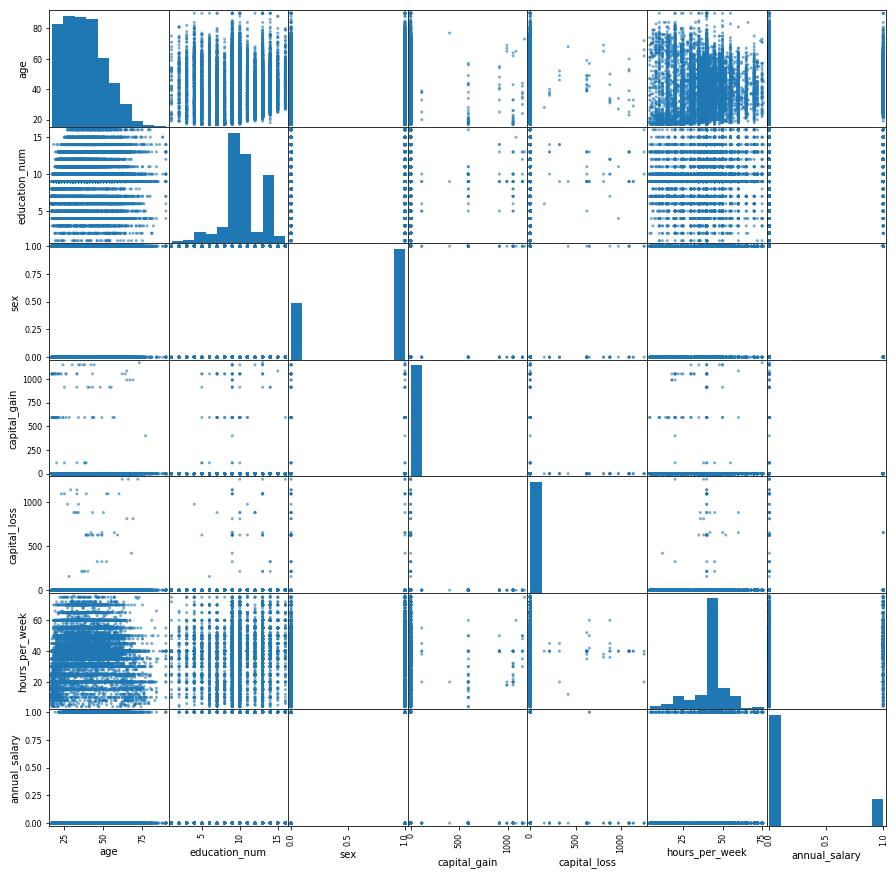

In [44]:
pd.plotting.scatter_matrix(df0, alpha=0.6, figsize=(15, 15))
plt.show()

This tells me that capital gains and losses are going to be problem graphs and that hours per week seems to have a pretty large gap between that and other options. Let's do a heatmap to see what correlation they have with each other before we move on.

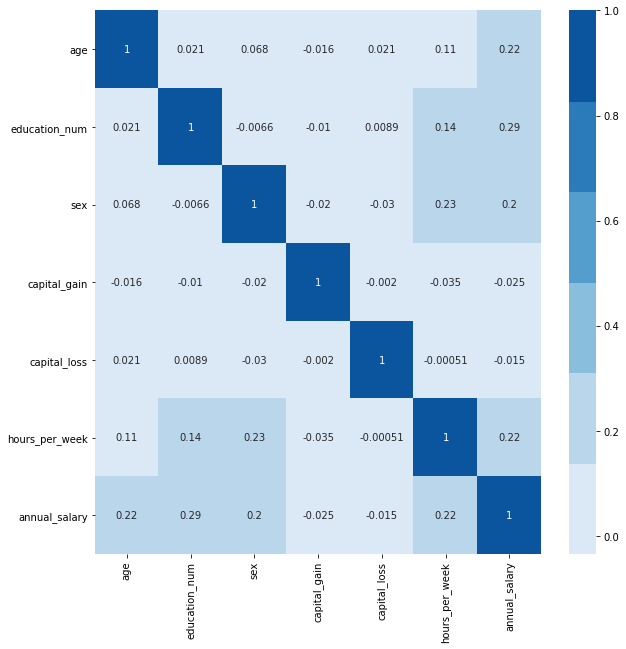

In [45]:
corr = df0.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, fmt='0.2g', cmap=sns.color_palette('Blues'))
plt.show()

The very stark answer we have here is that aside from the ones that are 1 to 1 ratios (which are the data compared to themself) there is virtually no correlation between any of these numerical columns. So let's start going over the categorical columns and seeing what is worth keeping and what isn't.

## Visualize the graphs

Let's make some box plots of each group together in combination between categorical and numerical data.

In [46]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26469 entries, 1 to 32559
Data columns (total 14 columns):
age               26469 non-null int64
work_class        26469 non-null object
education         26469 non-null object
education_num     26469 non-null int64
martial_status    26469 non-null object
occupation        26469 non-null object
relationship      26469 non-null object
race              26469 non-null object
sex               26469 non-null int64
capital_gain      26469 non-null int64
capital_loss      26469 non-null int64
hours_per_week    26469 non-null int64
native_country    26469 non-null object
annual_salary     26469 non-null int64
dtypes: int64(7), object(7)
memory usage: 3.0+ MB


In [47]:
numeric_variables = list(df0.dtypes[df0.dtypes != 'object'].index)
categoric_variables = list(df0.dtypes[df0.dtypes != 'int64'].index)

In [48]:
# Used to check the head of each to confirm they're correct.

# df0[numeric_variables].head()
# df0[categoric_variables].head()

#### Numerical Visualizations

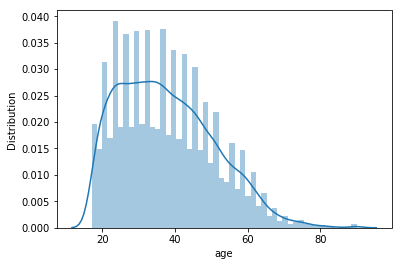

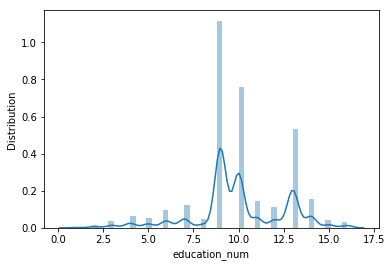

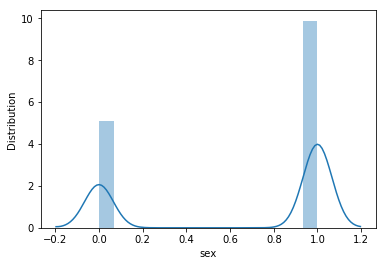

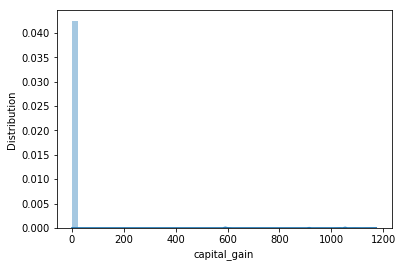

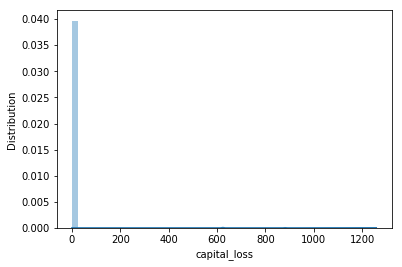

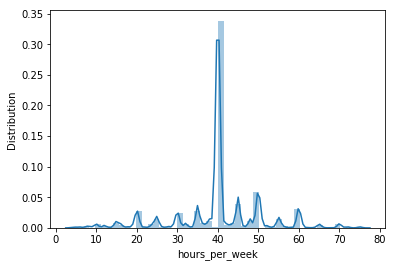

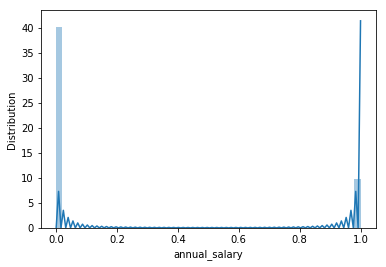

In [49]:
for i in numeric_variables:
    plt.figure(i)
    a = sns.distplot(df0[numeric_variables][i])
    a.set_ylabel('Distribution')

Those look pretty rough, for the most part it seems that a majority of the numerical columns have a stark 'answer' that everyone has ith a few people having anything else. Even after cutting out so many outliers the capital gains and capital loss columns just look terrible. And even when log-transformed they look to be the same.

#### Categorical Visualizations

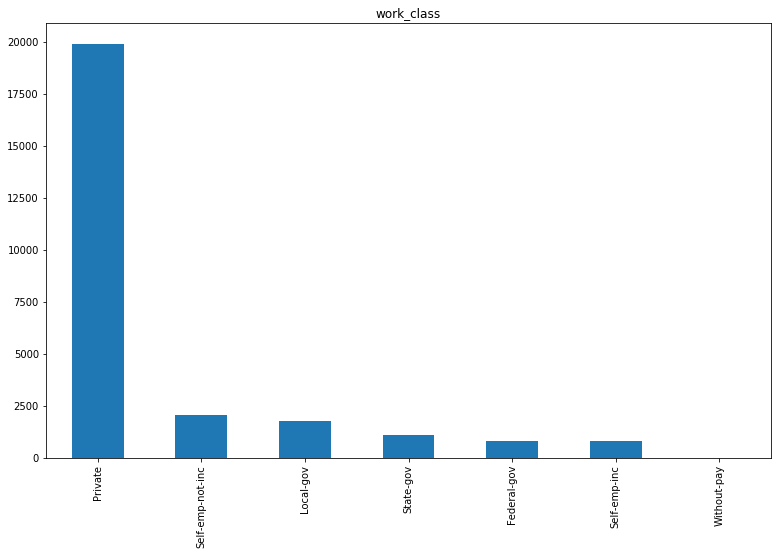

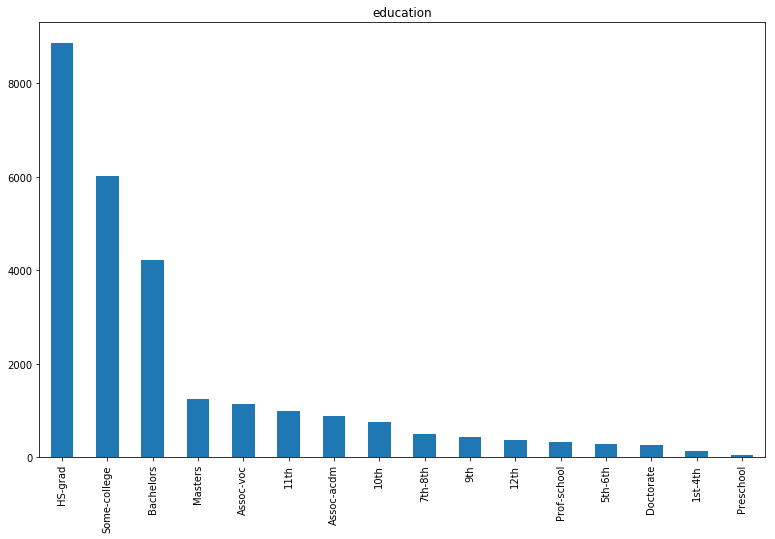

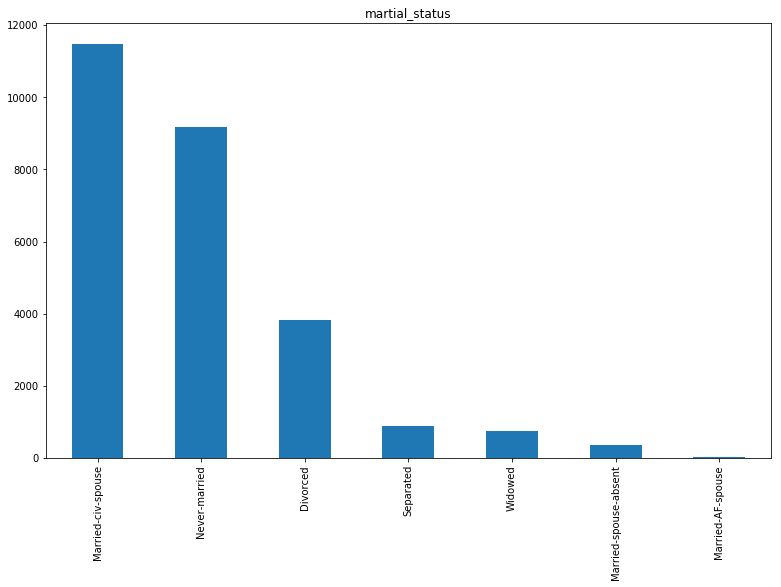

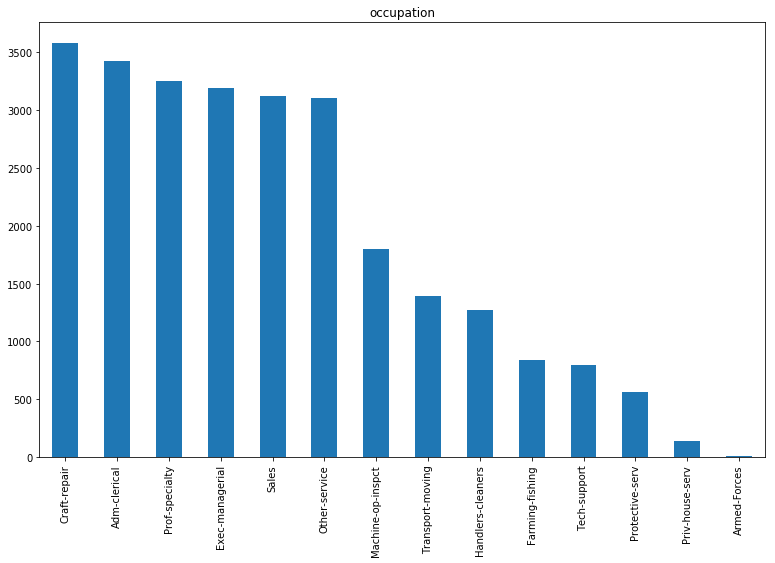

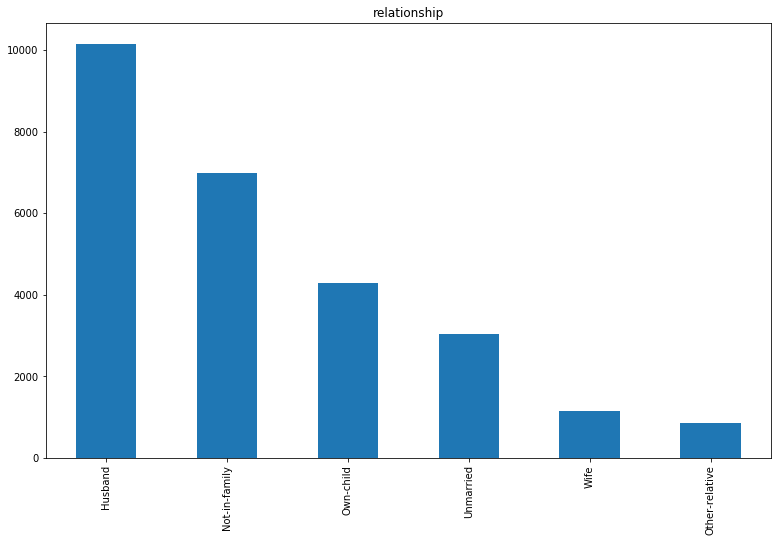

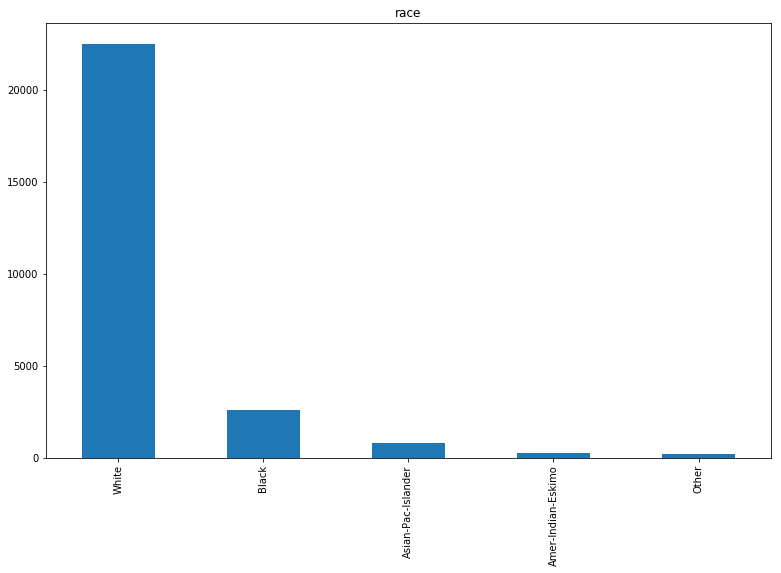

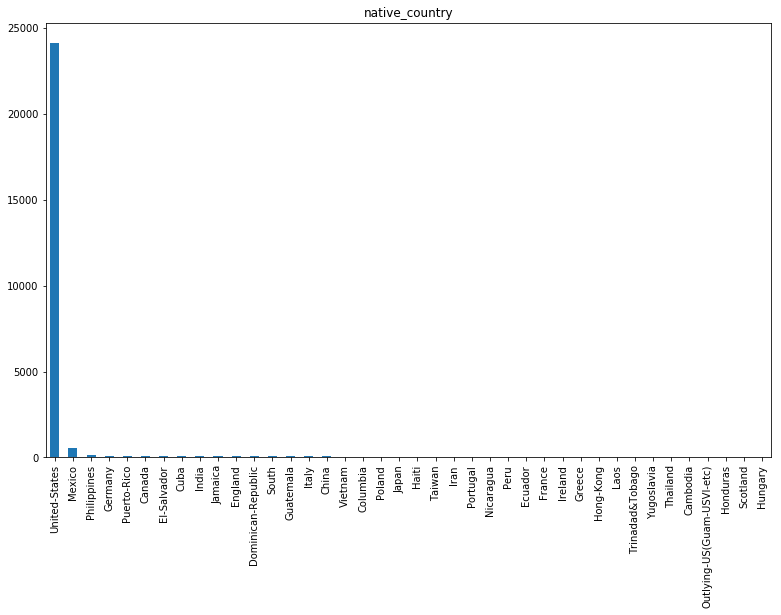

In [50]:
for i in categoric_variables:
    plt.figure(i, figsize=(13, 8))
    a = df0[i].value_counts().plot(kind='bar')
    a.set_title(i)

In [51]:
for i in categoric_variables:
    print('\t' + i)
    print(df0[i].value_counts())
    print('\n')

	work_class
Private             19904
Self-emp-not-inc     2045
Local-gov            1775
State-gov            1130
Federal-gov           805
Self-emp-inc          798
Without-pay            12
Name: work_class, dtype: int64


	education
HS-grad         8863
Some-college    6014
Bachelors       4220
Masters         1247
Assoc-voc       1134
11th             981
Assoc-acdm       877
10th             766
7th-8th          505
9th              435
12th             366
Prof-school      336
5th-6th          278
Doctorate        261
1st-4th          144
Preschool         42
Name: education, dtype: int64


	martial_status
Married-civ-spouse       11487
Never-married             9168
Divorced                  3814
Separated                  884
Widowed                    749
Married-spouse-absent      349
Married-AF-spouse           18
Name: martial_status, dtype: int64


	occupation
Craft-repair         3580
Adm-clerical         3422
Prof-specialty       3254
Exec-managerial      3187
Sales   

Well that's pretty contrasting. It seems that most of these columns have a good mix but 'native country' is so far skewed to being one group that I think we'll be droppping it from the test. Working Class and Race are also both on the potential list of drop columns since they have a really high bias to one variable.

### Numerical to Categorical Column Comparison 
Let's make boxplots for each of the groups that are remaining and see what they look like.

In [52]:
# Used to check for names

categoric_variables
# numeric_variables

['work_class',
 'education',
 'martial_status',
 'occupation',
 'relationship',
 'race',
 'native_country']

In [53]:
list_used = ['age', 'education_num', 'hours_per_week']

In [54]:
def box_plotter(variable):
    i = 0
    print(variable.title())
    for item in list_used:
        plt.figure(i, figsize=(8, 5))
        ax = sns.boxplot(y=df0[variable], x=df0[item])
        ax.set_title(variable.title() + ' x ' + item.title())
        i += 1
        plt.show()

In [55]:
def reverse_box_plotter(variable):
    i = 0
    print(variable.title())
    for item in list_used:
        plt.figure(i, figsize=(8, 5))
        ax = sns.boxplot(x=df0[variable], y=df0[item])
        ax.set_title(variable.title() + ' x ' + item.title())
        i += 1
        plt.show()

### Education vs.
This one is a bit trickier since there were two education columns.

Education


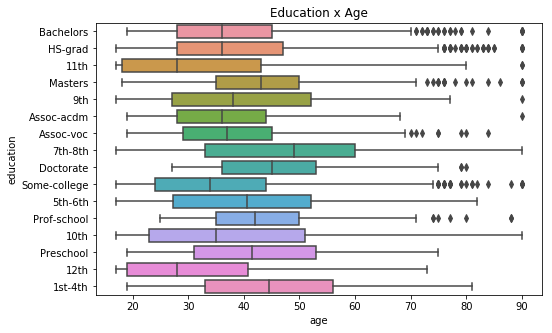

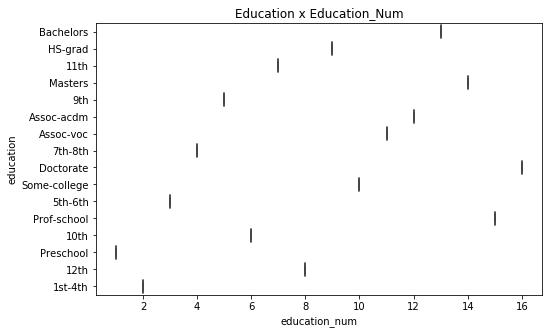

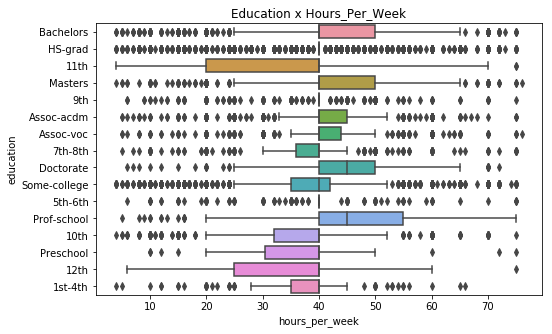

In [56]:
box_plotter('education')

Well those are just all jumbled and hard to read and education vs education num are two columns based on each other so that's no good for us. Let's do a quick removal of Education and use Education Number so that they are ordered by lowest education to highest.

In [57]:
# We don't want to call education_num as both the x and y variable for the set below so we are changing this for now.
list_used = ['age', 'hours_per_week']

Education_Num


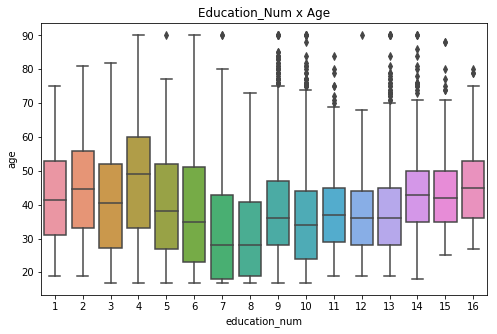

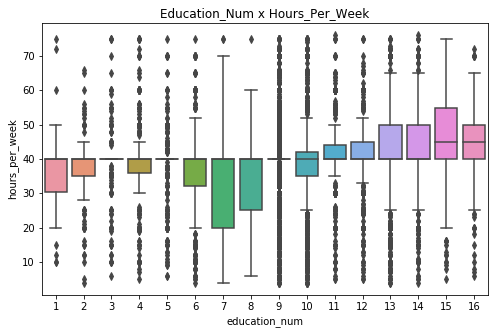

In [58]:
reverse_box_plotter('education_num')

These look significantly better! It actually shows progression and it also gives the insight we were looking for with varying educations. 

**Reference:**
   
   * 1 = Preschool
   * 3 = ES Graduate
   * 5 = MS Graduate
   * 9 = HS Graduate
   * 13 = Bachelors Degree
   * 16 = Phd Degree

We're going to remove the education column and keep the education num column since it is already numerical but it also provides us with more information. But to keep things easier we're going to shorten the number of groupings.

In [59]:
df0.education_num.unique()

array([13,  9,  7, 14,  5, 12, 11,  4, 16, 10,  3, 15,  6,  1,  8,  2],
      dtype=int64)

In [60]:
# Elementary School Grad
df0.loc[(df0['education_num'] == 1) | (df0['education_num'] == 2) | (df0['education_num'] == 3), 'education_num'] = 1   
df1.loc[(df1['education_num'] == 1) | (df1['education_num'] == 2) | (df1['education_num'] == 3), 'education_num'] = 1

In [61]:
# Middle School Grad
df0.loc[(df0['education_num'] == 4) | (df0['education_num'] == 5), 'education_num'] = 2
df1.loc[(df1['education_num'] == 4) | (df1['education_num'] == 5), 'education_num'] = 2

In [62]:
# HS Grad
df0.loc[(df0['education_num'] == 6) | (df0['education_num'] == 7), 'education_num'] = 3
df1.loc[(df1['education_num'] == 6) | (df1['education_num'] == 7), 'education_num'] = 3

In [63]:
# HS Grad pt 2
df0.loc[(df0['education_num'] == 8) | (df0['education_num'] == 9), 'education_num'] = 3
df1.loc[(df1['education_num'] == 8) | (df1['education_num'] == 9), 'education_num'] = 3

In [64]:
# Some College
df0.loc[(df0['education_num'] == 10) | (df0['education_num'] == 11) | (df0['education_num'] == 12), 'education_num'] = 4
df1.loc[(df1['education_num'] == 10) | (df1['education_num'] == 11) | (df1['education_num'] == 12), 'education_num'] = 4

In [65]:
# Undergrad
df0.loc[(df0['education_num'] == 13), 'education_num'] = 5
df1.loc[(df1['education_num'] == 13), 'education_num'] = 5
                                                                           
# Masters
df0.loc[(df0['education_num'] == 14), 'education_num'] = 6
df1.loc[(df1['education_num'] == 14), 'education_num'] = 6

 # PhD
df0.loc[(df0['education_num'] == 15) | (df0['education_num'] == 16), 'education_num'] = 7
df1.loc[(df1['education_num'] == 15) | (df1['education_num'] == 16), 'education_num'] = 7

In [66]:
df0.education_num.value_counts()

3    10976
4     8025
5     4220
6     1247
2      940
7      597
1      464
Name: education_num, dtype: int64

Okay now that we have made the groups more reasonable, let's check the graphs again.

Education_Num


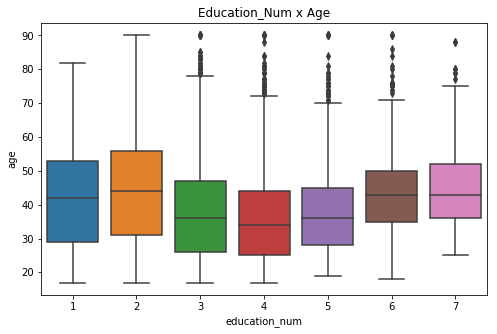

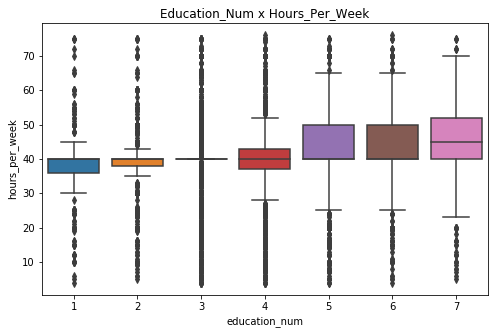

In [67]:
reverse_box_plotter('education_num')

In [68]:
df0.drop(['education'], axis=1, inplace=True)
df1.drop(['education'], axis=1, inplace=True)

In [69]:
df0.rename(columns={'education_num':'education'}, inplace = True)
df1.rename(columns={'education_num':'education'}, inplace = True)

It does show that those who are older tend to have less education and that those who have the highest ranges of education are in fact the ones who work the most consistently. So we'll keep this grouping and we'll remove the old education column.

We'll also have to change out list_used back to including education.

In [70]:
list_used = ['age', 'education', 'hours_per_week']

### Working Class vs.
Now that we have changed up how the education number column works this will look very different too.

Work_Class


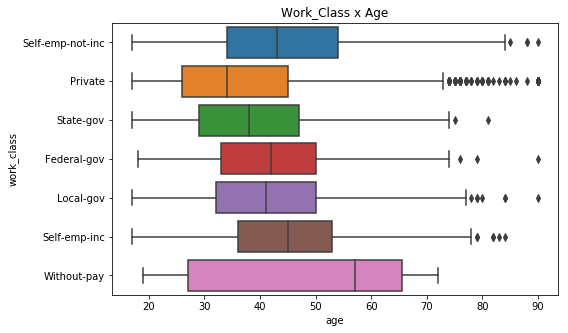

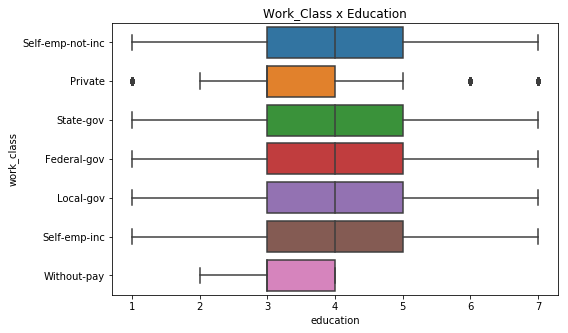

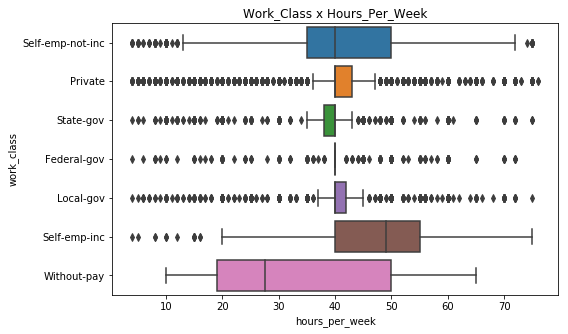

In [71]:
box_plotter('work_class')

The government columns are super small so we'll combine them together to fix this issue.

In [72]:
df0.loc[(df0['work_class'] == 'State-gov') | (df0['work_class'] == 'Federal-gov') | (df0['work_class'] == 'Local-gov'), 'work_class'] = 'Gov'
df1.loc[(df1['work_class'] == 'State-gov') | (df1['work_class'] == 'Federal-gov') | (df1['work_class'] == 'Local-gov'), 'work_class'] = 'Gov'

Work_Class


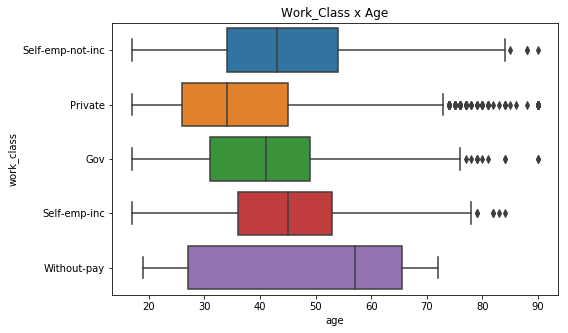

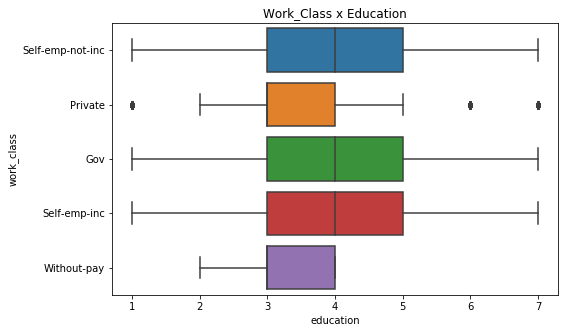

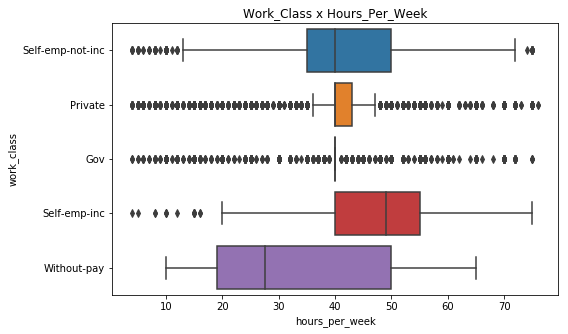

In [73]:
box_plotter('work_class')

### Martial Status vs.
I'm not sure what to expect with this grouping. I would asume that it will range quite well but divorces may be lower due to the era this data was taken.

Martial_Status


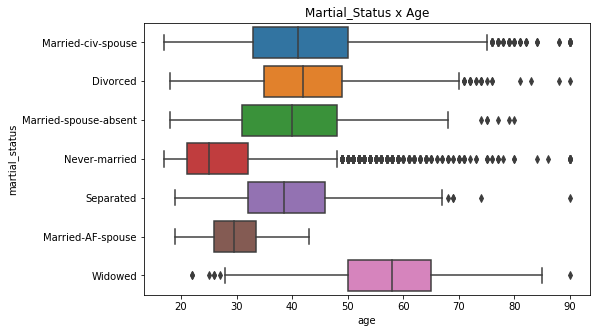

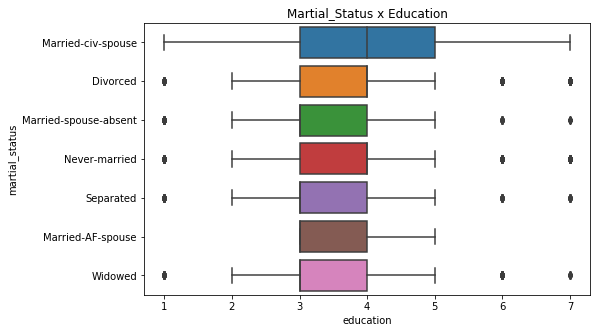

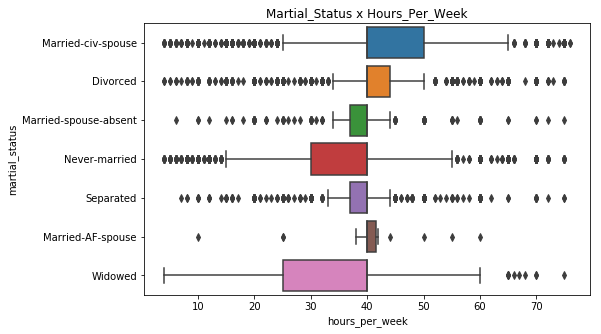

In [74]:
box_plotter('martial_status')

In [75]:
# All Married Groups

df0.loc[(df0.martial_status == 'Married-civ-spouse') | (df0.martial_status == 'Married-AF-spouse') | (df0.martial_status == 'Married-spouse-absent'), 'martial_status'] = 'Married'
df1.loc[(df1.martial_status == 'Married-civ-spouse') | (df1.martial_status == 'Married-AF-spouse') | (df1.martial_status == 'Married-spouse-absent'), 'martial_status'] = 'Married'

# Divorced/Separated Groups
df0.loc[(df0.martial_status ==  'Divorced') | (df0.martial_status == 'Separated'), 'martial_status'] = 'Divored/Separated'
df1.loc[(df1.martial_status ==  'Divorced') | (df1.martial_status == 'Separated'), 'martial_status'] = 'Divored/Separated'

Martial_Status


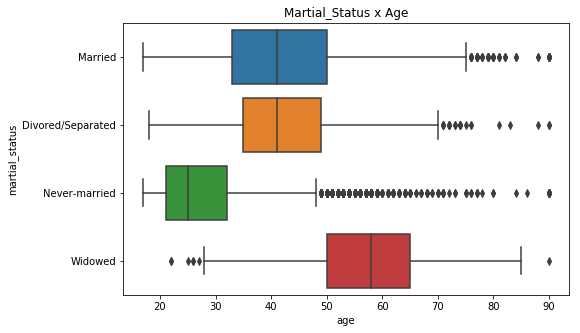

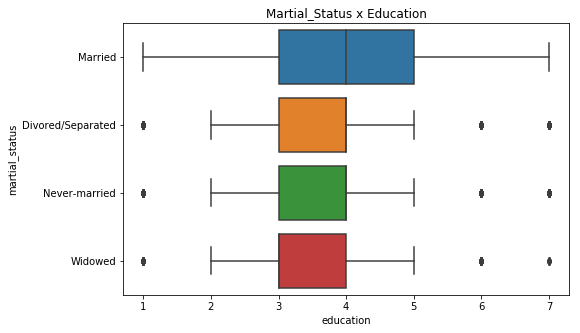

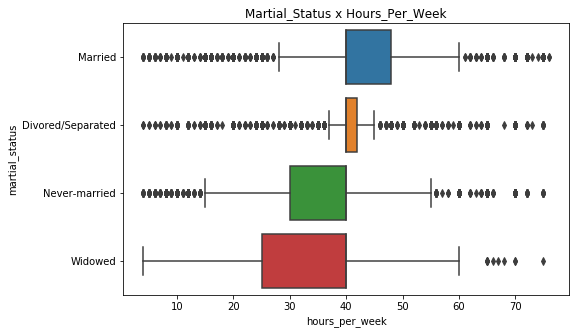

In [76]:
box_plotter('martial_status')

Well after cleaning up these column variables it really does give a better idea of the ranges for each group than it did previously. What is interesting is how much more educated married people are than divorced/separated, never-married, and widowed people.

### Occupation vs.
I expect newer occupations or 'young-people' professions to have either lower age ranges, higher education, and probably more hours worked but let's see what they offer.

Occupation


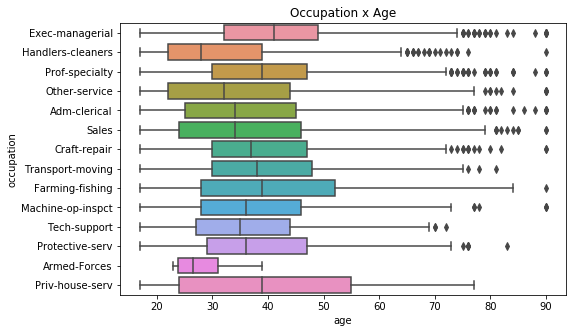

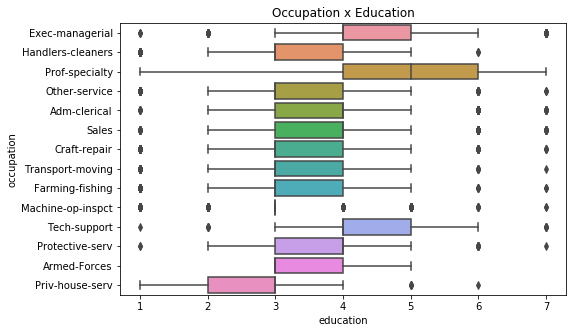

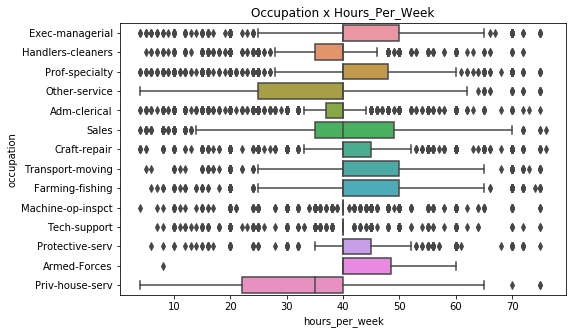

In [77]:
box_plotter('occupation')

Well aside from Armed Forces being so randomly out there it seems that Tech support is also in a weird range where its filled with younger people with higher education but hours range violently.

### Relationship
This is another category that I think will be interesting. I think age and education level will be most relevant for this grouping.

Relationship


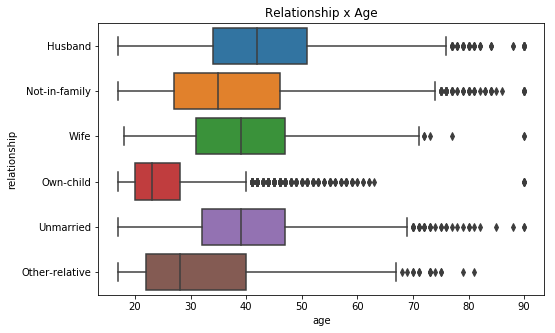

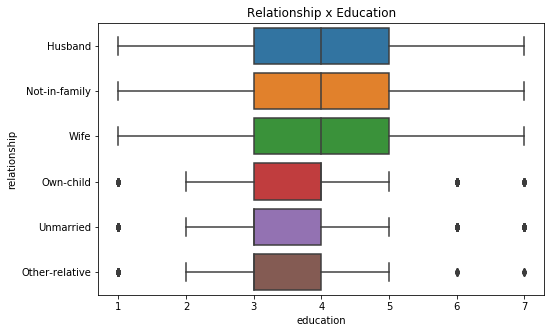

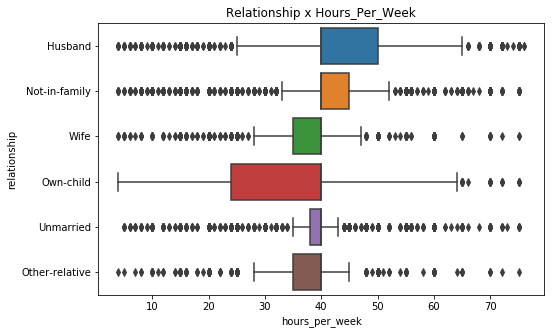

In [78]:
box_plotter('relationship')

In [79]:
# This was removed due to creating a highly correlated grouop

# df0.loc[(df0.relationship == 'Husband') |  (df0.relationship == 'Wife'), 'relationship'] = 'Spouse'
# df1.loc[(df1.relationship == 'Husband') |  (df1.relationship == 'Wife'), 'relationship'] = 'Spouse'

Relationship


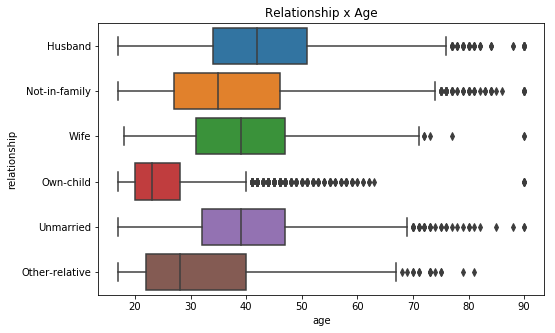

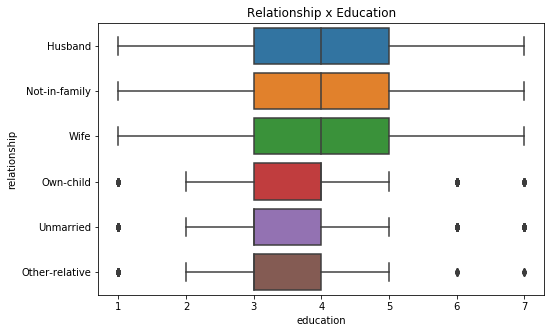

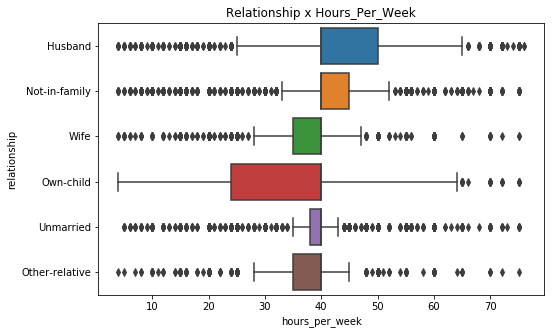

In [80]:
box_plotter('relationship')

Well overall it seems that the age of people who are married is the highest of any group but in education they're tied with "not in family". And then hours per week work is all over the place.

### Race vs.
Well there doesn't seem to be a lot of options for race listed and while the data may be helpful to some degree there are large ethnic groups just not listed so we will probably toss this column after we review it.

Race


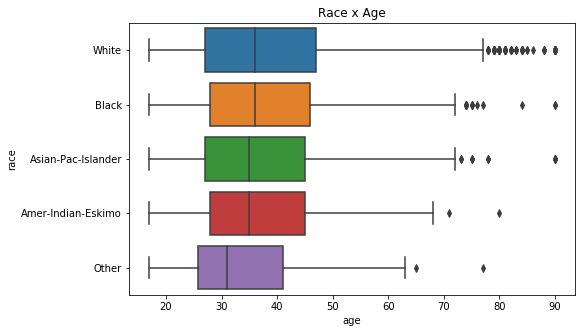

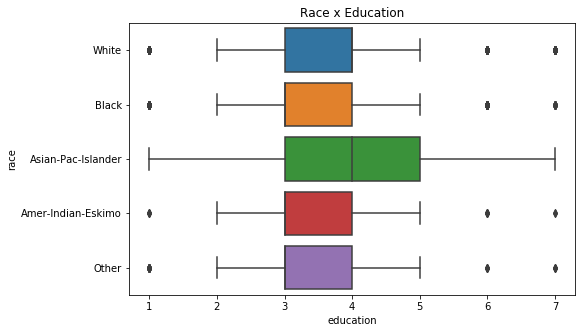

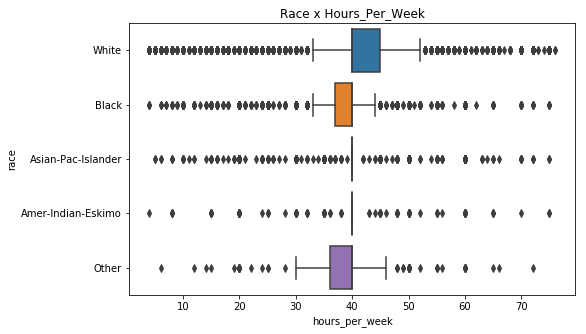

In [81]:
box_plotter('race')

Well it does seem to be pretty averaged out in terms of age for the different races but the other two groups don't hold much information that I can utilize. We'll drop this column from the group.

In [82]:
df0.drop(['race'], axis=1, inplace=True)
df1.drop(['race'], axis=1, inplace=True)

### Native Country vs.
This group is going to need serious trimming since there are so many small categories that I may just very well make the column based on the continent you are from.

Native_Country


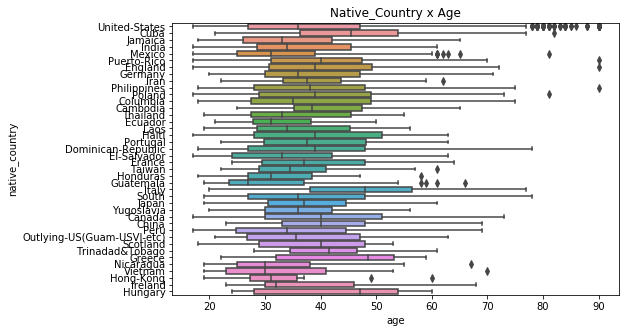

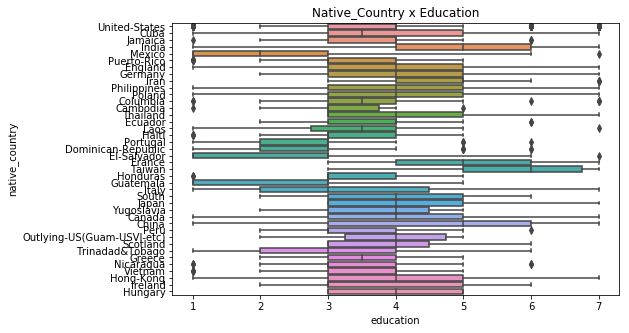

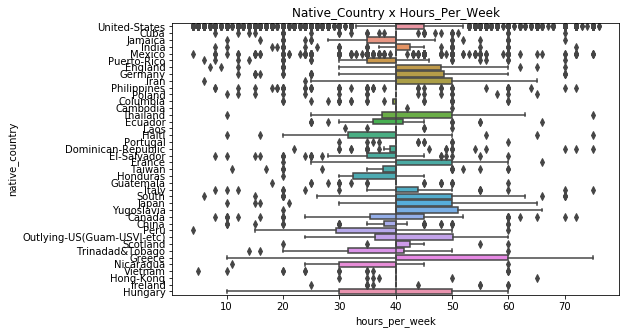

In [83]:
box_plotter('native_country')

Well this is just too ugly to read so I'll be trimming it up.

In [84]:
# Central America
df0.loc[(df0.native_country == 'Cuba') | (df0.native_country == 'Jamaica') | (df0.native_country == 'Mexico') | (df0.native_country == 'Canada') | (df0.native_country == 'Puerto-Rico') | (df0.native_country == 'South'), 'native_country'] = 'Other North American Countries'
df0.loc[(df0.native_country == 'Haiti') | (df0.native_country == 'Dominican-Republic') | (df0.native_country == 'Guatemala') | (df0.native_country == 'Outlying-US(Guam-USVI-etc)') | (df0.native_country == 'Nicaragua') |  (df0.native_country == 'Honduras'), 'native_country'] = 'Other North American Countries'

df1.loc[(df1.native_country == 'Cuba') | (df1.native_country == 'Jamaica') | (df1.native_country == 'Mexico') | (df1.native_country == 'Canada') | (df1.native_country == 'Puerto-Rico') | (df1.native_country == 'South'), 'native_country'] = 'Other North American Countries'
df1.loc[(df1.native_country == 'Haiti') | (df1.native_country == 'Dominican-Republic') | (df1.native_country == 'Guatemala') | (df1.native_country == 'Outlying-US(Guam-USVI-etc)') | (df1.native_country == 'Nicaragua') |  (df1.native_country == 'Honduras'), 'native_country'] = 'Other North American Countries'

# Asia
df0.loc[(df0.native_country == 'Iran') | (df0.native_country == 'Philippines') | (df0.native_country == 'Cambodia') | (df0.native_country == 'Thailand') | (df0.native_country == 'Hong-Kong'), 'native_country'] = 'Asia'
df0.loc[(df0.native_country == 'Laos') | (df0.native_country == 'India') | (df0.native_country == 'Taiwan') | (df0.native_country == 'China') | (df0.native_country == 'Japan') | (df0.native_country == 'Vietnam'), 'native_country'] = 'Asia'

df1.loc[(df1.native_country == 'Iran') | (df1.native_country == 'Philippines') | (df1.native_country == 'Cambodia') | (df1.native_country == 'Thailand') | (df1.native_country == 'Hong-Kong'), 'native_country'] = 'Asia'
df1.loc[(df1.native_country == 'Laos') | (df1.native_country == 'India') | (df1.native_country == 'Taiwan') | (df1.native_country == 'China') | (df1.native_country == 'Japan') | (df1.native_country == 'Vietnam'), 'native_country'] = 'Asia'

# Africa

# South America
df0.loc[(df0.native_country == 'Columbia') | (df0.native_country == 'Ecuador') | (df0.native_country == 'El-Salvador') | (df0.native_country == 'Peru') | (df0.native_country == 'Trinadad&Tobago'), 'native_country'] = "South America"

df1.loc[(df1.native_country == 'Columbia') | (df1.native_country == 'Ecuador') | (df1.native_country == 'El-Salvador') | (df1.native_country == 'Peru') | (df1.native_country == 'Trinadad&Tobago'), 'native_country'] = "South America"

# Europe
df0.loc[(df0.native_country == 'England') | (df0.native_country == 'Germany') | (df0.native_country == 'Italy') | (df0.native_country == 'Portugal') | (df0.native_country == 'Poland') | (df0.native_country == 'Hungary'), 'native_country'] = 'Europe'
df0.loc[(df0.native_country == 'France') | (df0.native_country == 'Yugoslavia') | (df0.native_country == 'Scotland') | (df0.native_country == 'Greece') | (df0.native_country == 'Ireland') | (df0.native_country == 'Holand-Netherlands'), 'native_country'] = 'Europe'

df1.loc[(df1.native_country == 'England') | (df1.native_country == 'Germany') | (df1.native_country == 'Italy') | (df1.native_country == 'Portugal') | (df1.native_country == 'Poland') | (df1.native_country == 'Hungary'), 'native_country'] = 'Europe'
df1.loc[(df1.native_country == 'France') | (df1.native_country == 'Yugoslavia') | (df1.native_country == 'Scotland') | (df1.native_country == 'Greece') | (df1.native_country == 'Ireland') | (df1.native_country == 'Holand-Netherlands'), 'native_country'] = 'Europe'

In [85]:
# Used to check that the loc were done correctlyb

# df0.native_country.unique()
# df1.native_country.unique()

### New Native Country vs.
Well there are no people in the survey from Africa or Austrailia/Oceania. In fact for how many Asian and South American people found in these columns I was surprised race didn't have more options so I'm glad I decided to drop that group since it was not going to give me valid results.

#### Why is the USA separate? 
Well I wanted to make sure that since this is a US Census that we keep the country that is doing the census separate for testing reasons. That way we don't end up taking a continental census and not a country census.

Native_Country


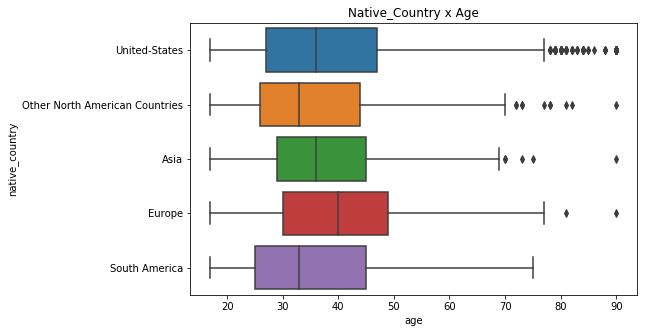

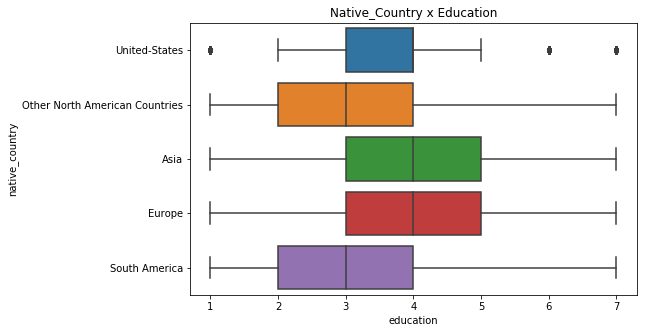

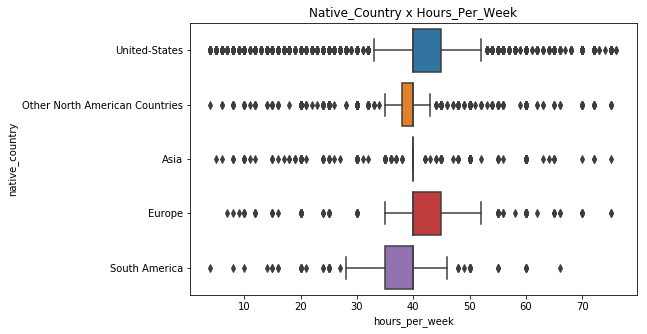

In [86]:
box_plotter('native_country')

What's crazy about these results are that while the United States had less poorly educated people, we in turn had very few highly educated people when compared to any other group surveyed. Which leads me to believe that many of the educated people from other countries have come to the USA through immigration and this would explain that. 

In [87]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26469 entries, 1 to 32559
Data columns (total 12 columns):
age               26469 non-null int64
work_class        26469 non-null object
education         26469 non-null int64
martial_status    26469 non-null object
occupation        26469 non-null object
relationship      26469 non-null object
sex               26469 non-null int64
capital_gain      26469 non-null int64
capital_loss      26469 non-null int64
hours_per_week    26469 non-null int64
native_country    26469 non-null object
annual_salary     26469 non-null int64
dtypes: int64(7), object(5)
memory usage: 3.9+ MB


Let's take a look at those categorical graphs again now that we have changed everything up.

In [88]:
new_categoric_variables = list(df0.dtypes[df0.dtypes != 'int64'].index)

In [89]:
new_categoric_variables

['work_class',
 'martial_status',
 'occupation',
 'relationship',
 'native_country']

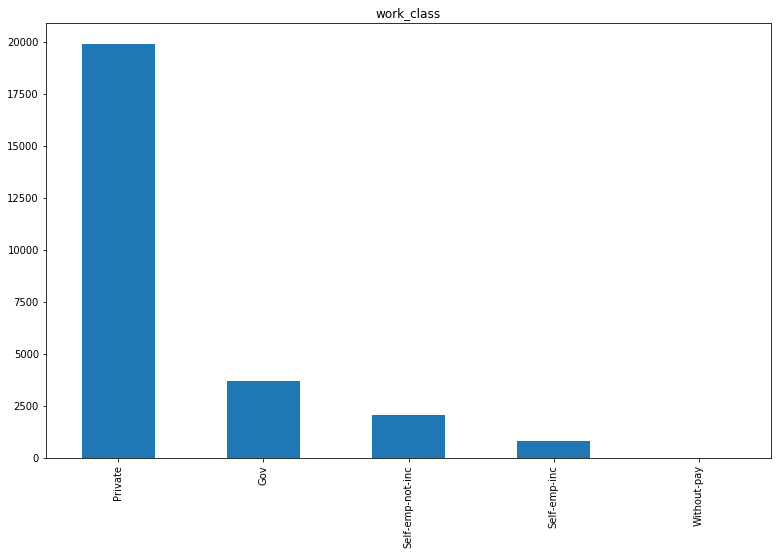

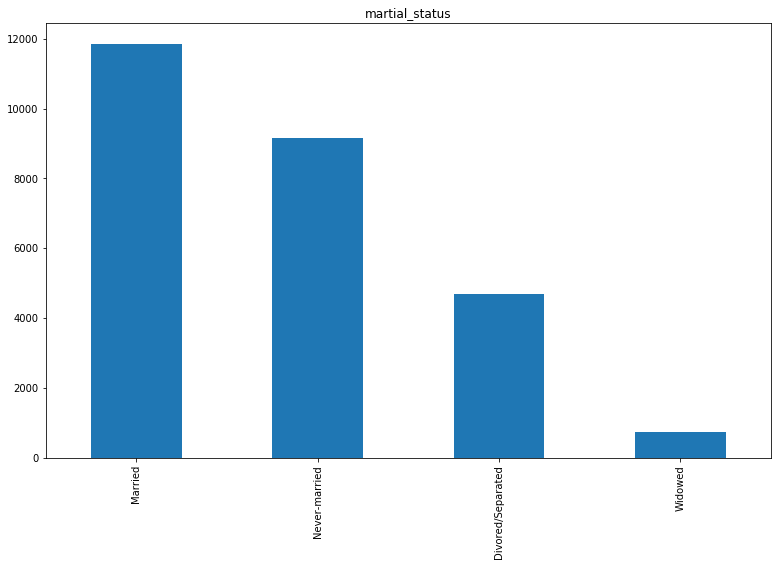

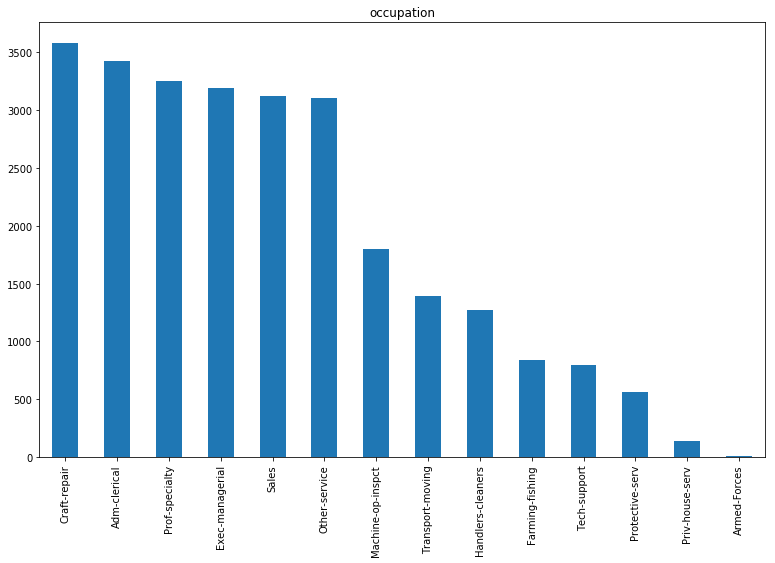

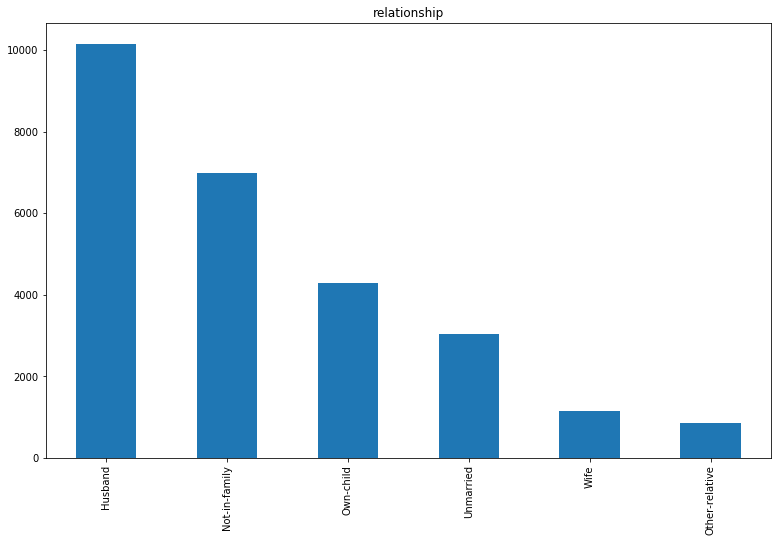

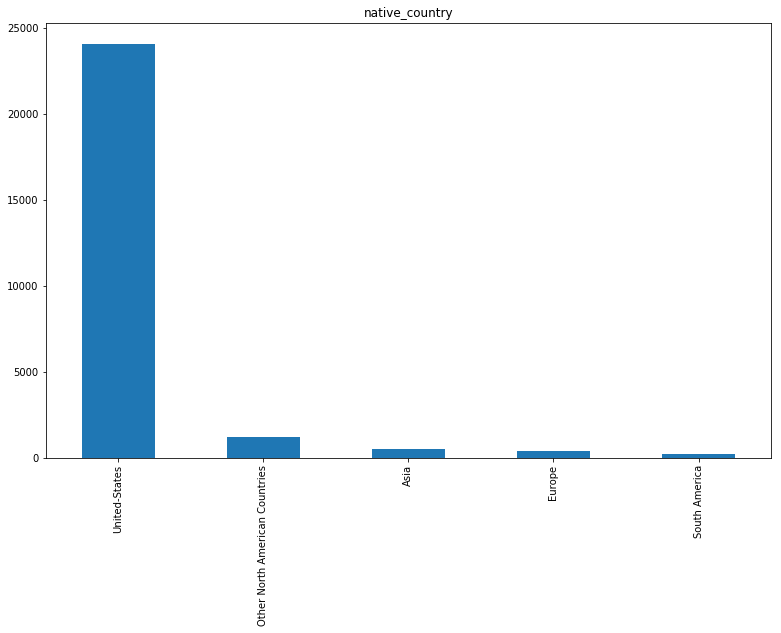

In [90]:
for i in new_categoric_variables:
    plt.figure(i, figsize=(13, 8))
    a = df0[i].value_counts().plot(kind='bar')
    a.set_title(i)

Most of these graphs look way better than they did before! But we have two that are pretty suspiscious still in the form of Working Class and Native Countries. They both have notoriously high single variables with everything else being super low. 

Let's check out their actual numbers to get an idea on how different these columns are.

In [91]:
print('\t' + ' Working Class')
print(df0.work_class.value_counts())
print('\n')
print('\t' + ' Native Countries')
print(df0.native_country.value_counts())

	 Working Class
Private             19904
Gov                  3710
Self-emp-not-inc     2045
Self-emp-inc          798
Without-pay            12
Name: work_class, dtype: int64


	 Native Countries
United-States                     24103
Other North American Countries     1203
Asia                                531
Europe                              423
South America                       209
Name: native_country, dtype: int64


Well those are pretty big differences but we'll keep them in for now since they at least have some variety but when we test our model these two columns may be the first to go.

### Visualization Results and final remarks

Well the visualizations of each column vs another really did help out. We even managed to condense and remove some columns that were no longer as helpful to the data as we predicted. We ended up losing the Education and the Race columsn due to redundancy and lack of solid survey data and now we're down to what is the meaty part of the data.

### Potential Questions

There are a few options that we have for positive questions that we can form with machine learning techniques and classification algorithms from this dataset.

    1. Logistic Regression on annual salary or sex.
        * Either would be a solid option to predict things with from an academic standpoint
    2. Decision Trees on race, sex, relationship, occupation, etc
        * These ccould be fun but it would be very time consuming
    3. Random Forst of the same topics in option 2.
        * This would be a much more complex and even slower option but would be interesting to do.

### Final Decision on Question
I think that a solid Logistic Regression is possible with this dataset so that will be what we pursue. However, we must get a few things done to have a well performing Logistic Regression.

### Multicolinearity Issue
Well since I feel like a logistic regression question is very doable with this data we're going to focus our attention on that. And in order to make sure that we can do oen we must make sure that no columns are correlated together.

Due to the scattermatrix and heatmap from earlier we know that none of the numerical columns have multicolinearity with each other. But we should check out the categorical columns as well.

In [92]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26469 entries, 1 to 32559
Data columns (total 12 columns):
age               26469 non-null int64
work_class        26469 non-null object
education         26469 non-null int64
martial_status    26469 non-null object
occupation        26469 non-null object
relationship      26469 non-null object
sex               26469 non-null int64
capital_gain      26469 non-null int64
capital_loss      26469 non-null int64
hours_per_week    26469 non-null int64
native_country    26469 non-null object
annual_salary     26469 non-null int64
dtypes: int64(7), object(5)
memory usage: 3.9+ MB


#### First Step

Now that we have all of the columns cleaned up and properly organized we will then create the dummy variables that we'll need for the following check. To keep things from getting hectic and needing to constantly reload things we'll create a new dataframe variable so we could just reset that to fix everything.

We also want to assign string names to the eduation column since it will be better checking it with dummies than using the numeric names it was given in the graphs so that they would show up in a certain order.

In [93]:
df_dummy = df0.copy()

In [94]:
# Now we will find the remaining categorical columns
categoric_variables = list(df_dummy.dtypes[df_dummy.dtypes != 'int64'].index)
categoric_variables

['work_class',
 'martial_status',
 'occupation',
 'relationship',
 'native_country']

Below we'll allocate the education column variables to strings then we'll reset the dataframe.

In [95]:
df0.loc[(df0['education'] == 1), 'education'] = 'ES-Grad'
df1.loc[(df1['education'] == 1), 'education'] = 'ES-Grad'

df0.loc[(df0['education'] == 2), 'education'] = 'MS-Grad'
df1.loc[(df1['education'] == 2), 'education'] = 'MS-Grad'

df0.loc[(df0['education'] == 3), 'education'] = 'HS-Grad'
df1.loc[(df1['education'] == 3), 'education'] = 'HS-Grad'

df0.loc[(df0['education'] == 4), 'education'] = 'Some-College'
df1.loc[(df1['education'] == 4), 'education'] = 'Some-College'

df0.loc[(df0['education'] == 5), 'education'] = 'Undergrad'
df1.loc[(df1['education'] == 5), 'education'] = 'Undergrad'

df0.loc[(df0['education'] == 6), 'education'] = 'Masters'
df1.loc[(df1['education'] == 6), 'education'] = 'Masters'

df0.loc[(df0['education'] == 7), 'education'] = 'PhD'
df1.loc[(df1['education'] == 7), 'education'] = 'PhD'

In [96]:
df_dummy = df0.copy()

We will also have a list of droppable columns to refer to for later tests on the confusion matrix.

In [97]:
# These are the most likely drop columns depending on the multicolinearity. 

df_dummy.drop(['martial_status'], axis = 1, inplace = True)

# df_dummy.drop(['occupation'], axis = 1, inplace = True)

# df_dummy.drop(['capital_gain'], axis = 1, inplace = True)
# df_dummy.drop(['capital_loss'], axis = 1, inplace = True)

# df_dummy.drop(['native_country'], axis = 1, inplace = True)

In [98]:
# Now we will find the remaining categorical columns
categoric_variables = list(df_dummy.dtypes[df_dummy.dtypes != 'int64'].index)
categoric_variables

['work_class', 'education', 'occupation', 'relationship', 'native_country']

#### Second Step

Now we'll created our X and y values as we create our dummy variables.

In [99]:
# This creates our y value.
y = df_dummy.annual_salary

In [100]:
# This will drop annual salary from the data frame that we will use to compare to annual salary.
df_dummy.drop(['annual_salary'], axis = 1, inplace = True)

This isn't too many to work with so let's see how many columns that will add to our dataframe.

In [101]:
for cat in categoric_variables:
    print(cat)
    print(df_dummy[cat].unique())
    print(df_dummy[cat].nunique())
    print('\n')

work_class
['Self-emp-not-inc' 'Private' 'Gov' 'Self-emp-inc' 'Without-pay']
5


education
['Undergrad' 'HS-Grad' 'Masters' 'MS-Grad' 'Some-College' 'PhD' 'ES-Grad']
7


occupation
['Exec-managerial' 'Handlers-cleaners' 'Prof-specialty' 'Other-service'
 'Adm-clerical' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' 'Protective-serv'
 'Armed-Forces' 'Priv-house-serv']
14


relationship
['Husband' 'Not-in-family' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']
6


native_country
['United-States' 'Other North American Countries' 'Asia' 'Europe'
 'South America']
5




Since we will be dropping the first column of each dummy group we will have a total of 35 extra columns added to the dataframe as we remove these 6.

In [102]:
X = pd.get_dummies(df_dummy, drop_first= True)

In [103]:
len(X.columns)

37

#### Final Step

Well let's make that heatmap and check for correlation now.

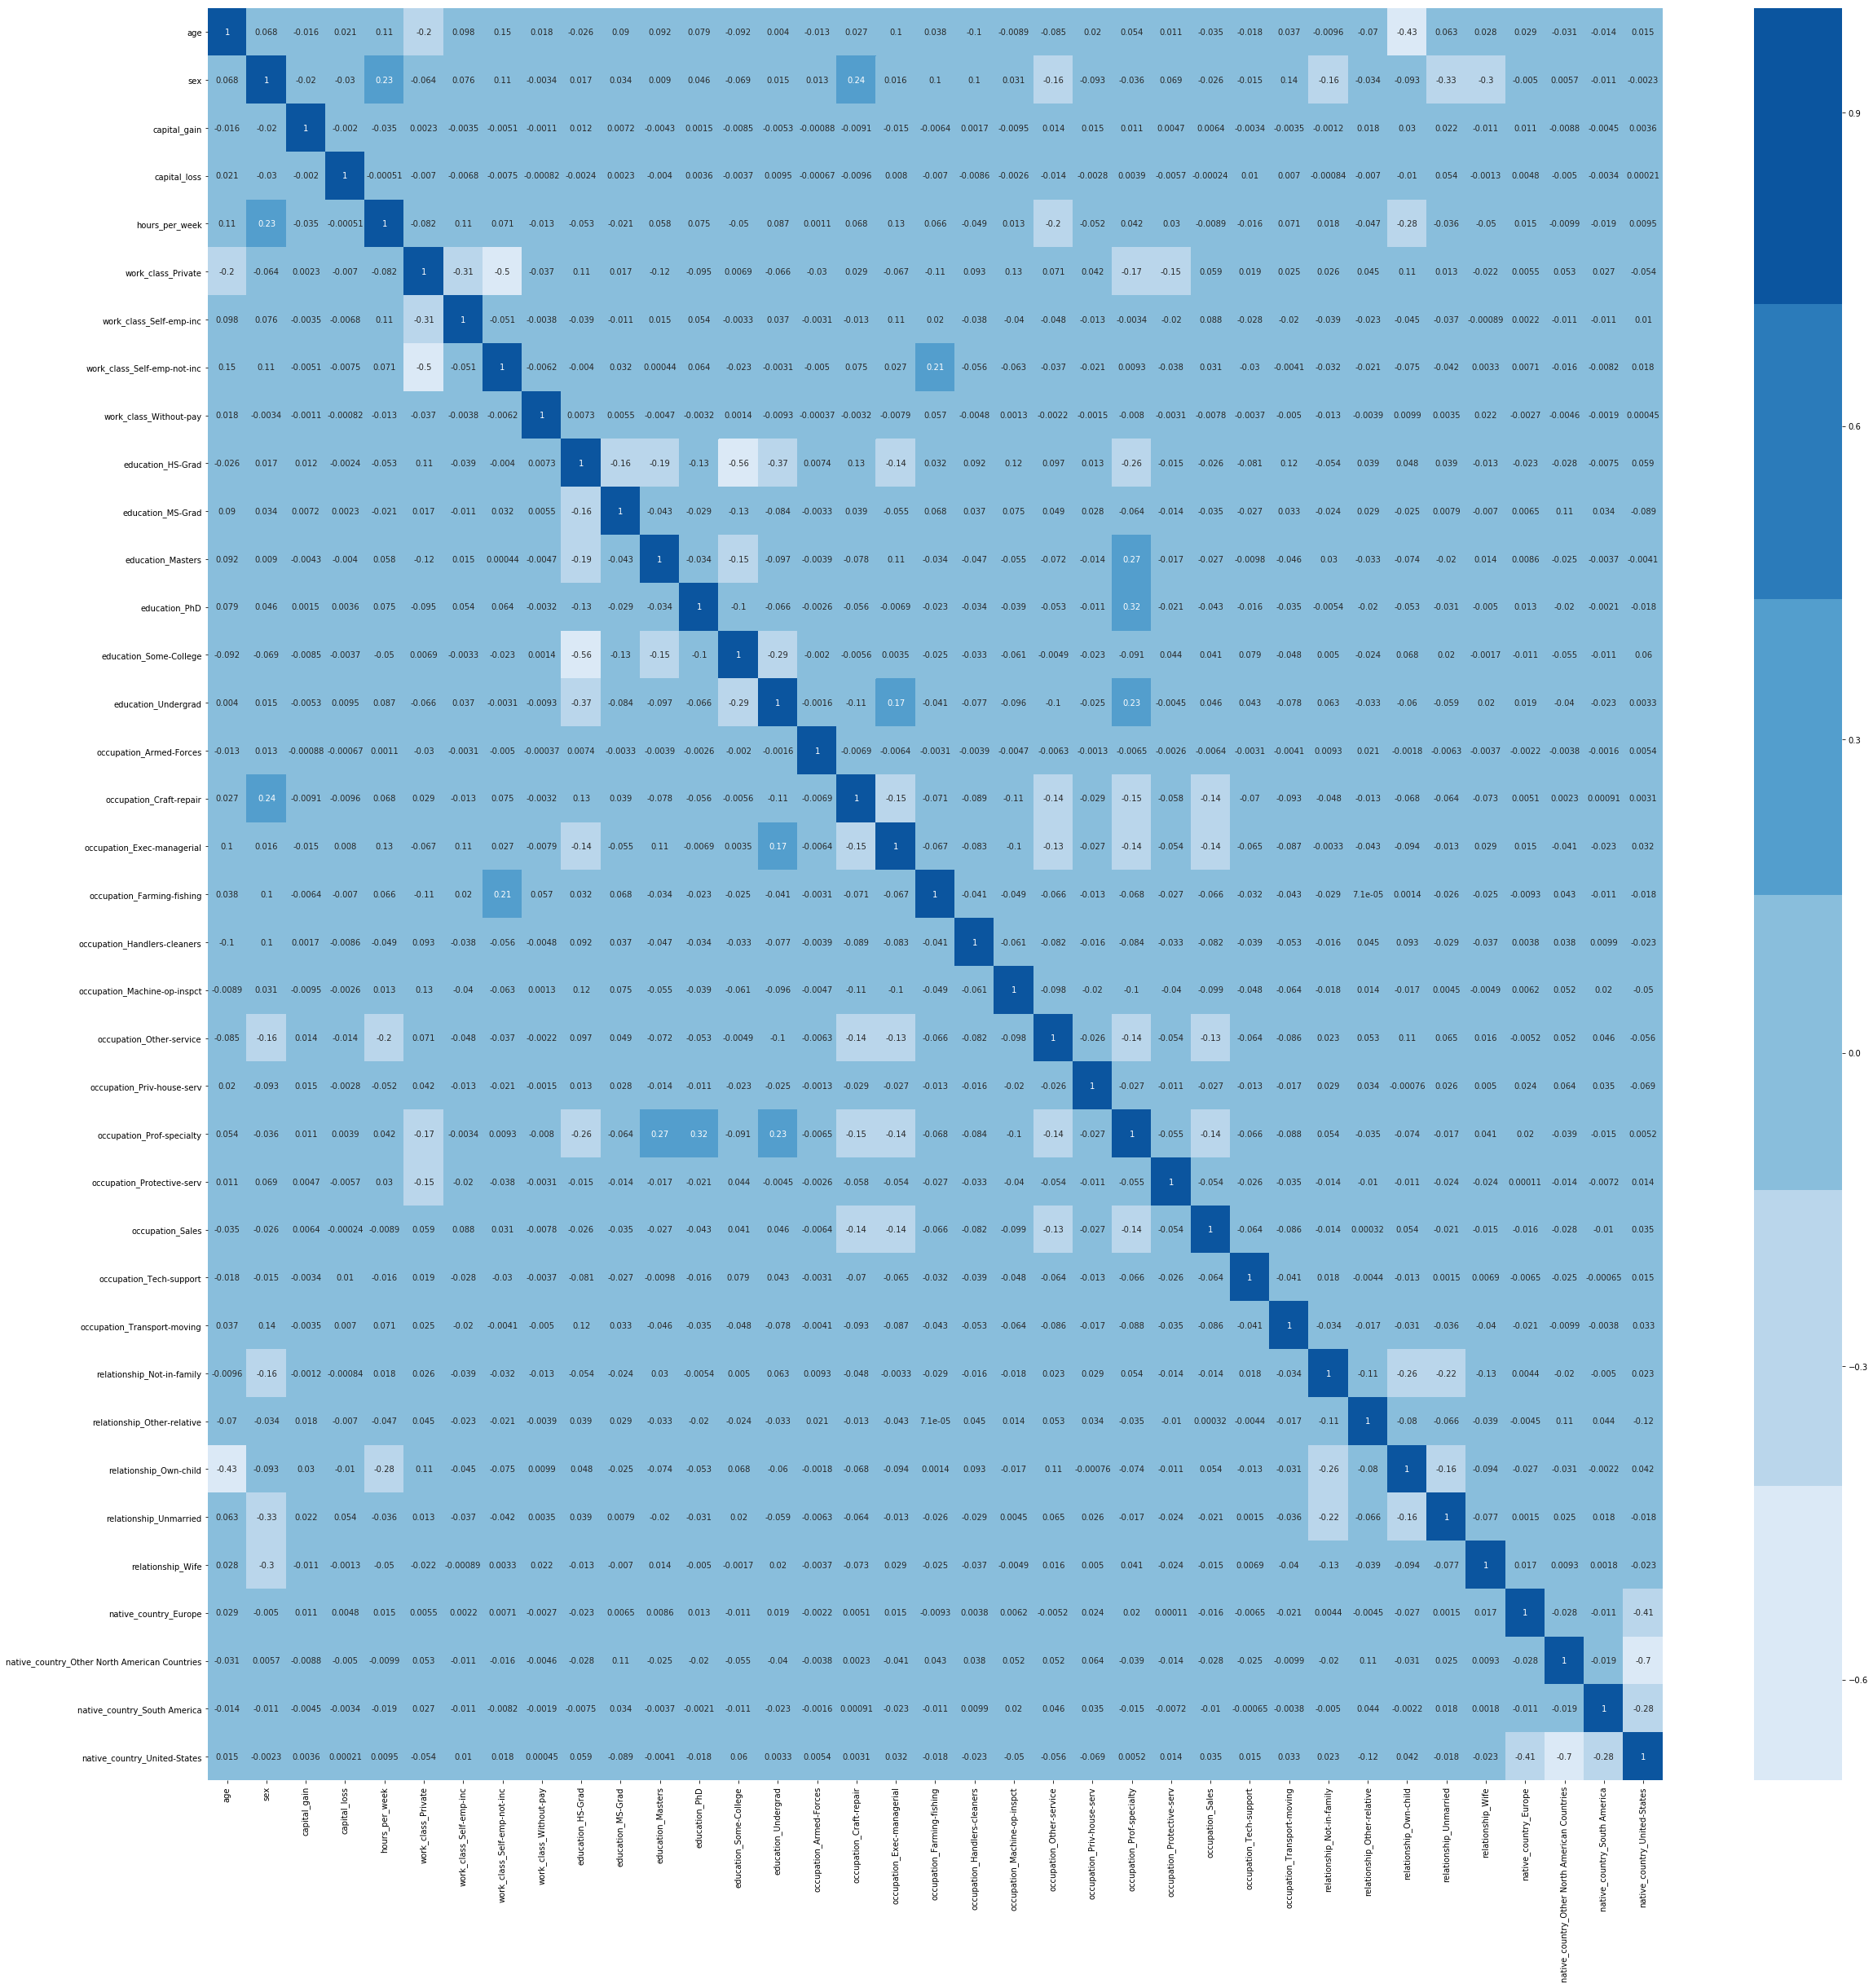

In [104]:
corr = X.corr()
plt.figure(figsize=(40, 40))
sns.heatmap(corr, annot=True, fmt='0.2g', cmap=sns.color_palette('Blues'))
plt.show()

The most highly correlated ones are own-child and never married now at exactly .50. I think that these will remain in however since they don't necessarily mean the same thing (that and when I remove this varible it makes more trouble than good).

I would say we dealt with most of our multicolinearity found within the dataset. Now onto the question.

## Question

I think that the most attainable information that would be helpful to my potential employer would be the first option with a logistic regression model checking their annual salary. 

The reason I think this model would be the one that would help the most is that my would-be employer is the government and they're wanting to check the people within the census on what tax bracket they should be in (however for the simplicity of the columns it would be 50K+ or below 50K). And we'll check this through the implementation of machine learning algorithms on all other numeric columns.

### How to go about this

First thing we're going to do is create a bunch of dummy variables from columns that we currently have that can be easily broken down into dummies. We'll avoid columns that already are redundant like education_num and just use education instead.

In [105]:
for col in X.columns:
    X[col] = (X[col] - min(X[col])) / (max(X[col]) - min(X[col]))
    
X.head()

,age,sex,capital_gain,capital_loss,hours_per_week,work_class_Private,work_class_Self-emp-inc,work_class_Self-emp-not-inc,work_class_Without-pay,education_HS-Grad,...,occupation_Transport-moving,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,native_country_Europe,native_country_Other North American Countries,native_country_South America,native_country_United-States
1,0.452055,1.0,0.0,0.0,0.125,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.287671,1.0,0.0,0.0,0.500,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.493151,1.0,0.0,0.0,0.500,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.150685,0.0,0.0,0.0,0.500,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5,0.273973,0.0,0.0,0.0,0.500,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [107]:
logreg = LogisticRegression(fit_intercept = False, C = 1e12)
model_log = logreg.fit(X_train, y_train)
model_log

C:\Users\Atlas\.conda\envs\New\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [108]:
y_hat_test = logreg.predict(X_test)
y_hat_train = logreg.predict(X_train)

In [109]:
residuals = np.abs(y_train - y_hat_train)
print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))

0    16876
1     2975
Name: annual_salary, dtype: int64
0    0.850133
1    0.149867
Name: annual_salary, dtype: float64


In [110]:
#We could subtract the two columns. If values or equal, difference will be zero. Then count number of zeros.
residuals = y_test - y_hat_test
print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))

 0    5596
 1     676
-1     346
Name: annual_salary, dtype: int64
 0    0.845573
 1    0.102146
-1    0.052282
Name: annual_salary, dtype: float64


Initially we had a train set with 85% accuracy and the test set accuracy is 85%.

This is very good but we can do better if we optimize it. But before we do that let's try and figure out what we want to optimize.

### Confusion Matrix

We should figure out how many our model is getting right vs. how many our model is predicting to be wrong. We need to sort out if we want precision, recall, accuracy, or F1. 

And we'll go over those below.

In [111]:
cnf_matrix = confusion_matrix(y_hat_test, y_test)
print('Confusion Matrix:\n',cnf_matrix)

Confusion Matrix:
 [[4951  676]
 [ 346  645]]


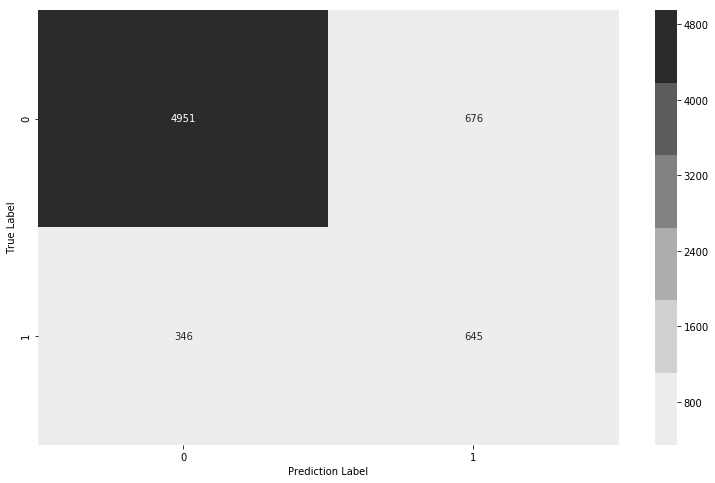

In [112]:
plt.figure(figsize=(13, 8))
sns.heatmap(cnf_matrix, annot=True, cmap=sns.color_palette('Greys'), fmt='1g')
plt.xlabel("Prediction Label")
plt.ylabel("True Label")
plt.show()

### Review of a Confusion Matrix and the calssification evaluation metrics

### [TN, FP]
### [FN, TP]

Precision = # of TP / # of Pred Pos

Recall = # of TP / # of Actual Pos

Accuracy =  of TP + TN / Total Observations

F1 = 2 x (Precision * Recall) / (Precision + Recall)

Since our evaluation of data is on predicting how many people make over 50K (Pos) or under $50K (Neg) let's review the matrix step by step:

TP = This tells us the number of people who make <b>over</b> 50K that we got right.

FN = This tells us the number of people who we thought made <b>over</b> 50K that we got wrong.

FP = This tells us the number of people who we thought made <b>under</b> 50K we got wrong.

TN = This tells us the number of people who make <b>under</b> 50K that we got right.

In [113]:
def Precision(TP, FP):
    return TP / (TP + FP)

def Recall(TP, FN):
    return TP / (TP + FN)

def Accuracy(TP, TN, FP, FN):
    return (TP + TN) / (TP + TN + FP + FN)

def F1(TP, TN, FP, FN):
    return (2 * (Precision(TP, FP) * Recall(TP, FN))) / (Precision(TP, FP) + Recall(TP, FN))

In [114]:
Precision(617, 666)

0.4809041309431021

In [115]:
Recall(617, 314)

0.6627282491944146

In [116]:
Accuracy(617, 5021, 666, 314)

0.8519190087639771

In [117]:
F1(617, 5021, 666, 314)

0.5573622402890694

### Focus of the Question

**Do we focus precision?**

Well how accurate do we need to be in a census? Does it cost us more to have False Positives? 

Being positive means we mark you as making over 50K so it would not be ideal to falsely classify someone who is below their means into a tax bracket they should not be a part of. 

**Do we focus recall?**

Do we care if we misclassify some who make over 50K as under 50K?

It would be overall less tax money in the system but they would still have the means to pay those unlike people who are misclassified into a higher bracket.

**What about F1?**

Well F1 is the mix of the two where we seek a balance of precision and recall.

It would not be a bad idea to mitigate both lost money from FN and over taxing FP, so we'll be obtaining this score regardless of our option to see what it shows up as.

#### What I think is best

I think we should focus on precision and F1 over recall. The reason being that misclassifying those who cannot pay a higher bracket just ruins lives and can lead to potential lawsuits whereas the opposite with recall is more of a typo on our behalf and can be rectified with further testing. 

#### Results of cleaning out Outliers

Well we seemed to have had a blanekt loss on all metrics aside from accuracy when dropping outliers and that is quite the surprise. I would have thought that dropping such skewed information such as the third standard deviation onward data would actually fix our project more than hurt it but then I considered why this happened to be the case. 

Our original metrics were skewed because we had so many outliers to begin with. So our data is more true to what the predictions of the lay person would be despite losing to our original data set. 

## Model Creation

In [118]:
params = {"penalty": ['l1', 'l2'],
          'tol': [0.001, 0.0001, 0.00001],
          'C': [1, 0.1, 0.01],
          'max_iter': [100, 500, 1000],
          'n_jobs': [-1]}

In [119]:
logreg = LogisticRegression()

In [120]:
gscv = GridSearchCV(logreg, params, n_jobs = -1, verbose = 1)

In [121]:
X_train.shape, y_train.shape

((19851, 37), (19851,))

In [122]:
gscv.fit(X_train, y_train)

C:\Users\Atlas\.conda\envs\New\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:    9.0s finished
C:\Users\Atlas\.conda\envs\New\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Atlas\.conda\envs\New\lib\site-packages\sklearn\linear_model\logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [1, 0.1, 0.01], 'max_iter': [100, 500, 1000],
                         'n_jobs': [-1], 'penalty': ['l1', 'l2'],
                         'tol': [0.001, 0.0001, 1e-05]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

### Model Results

Well our model is truly middle of the road here. It's best parameters that we have found are:

    c = 1.0
    Max Iter = 100    
    n_jobs = None    
    penalty = l2    
    tolerance = 0.0001

Now that we have this information, let's try and cross validate this with our cross validation set that we cleaned up a long time ago.

In [123]:
df_dummy1 = df1.copy()

In [124]:
df_dummy1.drop(['martial_status'], axis = 1, inplace = True)

In [125]:
y = df_dummy1.annual_salary

# Drop it from the dataframe we plan to use for X
df_dummy1.drop(['annual_salary'], axis = 1, inplace = True)

In [126]:
# Now we dummify the rest.

X = pd.get_dummies(df_dummy1, drop_first = True)
X.head()

,age,sex,capital_gain,capital_loss,hours_per_week,work_class_Private,work_class_Self-emp-inc,work_class_Self-emp-not-inc,work_class_Without-pay,education_HS-Grad,...,occupation_Transport-moving,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,native_country_Europe,native_country_Other North American Countries,native_country_South America,native_country_United-States
0,25,1,0,0,40,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
1,38,1,0,0,50,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,28,1,0,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,44,1,7688,0,40,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,34,1,0,0,30,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1


In [127]:
for col in X.columns:
    X[col] = (X[col] - min(X[col])) / (max(X[col]) - min(X[col]))

In [128]:
X.head()

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [129]:
logreg = LogisticRegression(fit_intercept = False, C = 1e12)
model_log = logreg.fit(X_train, y_train)
model_log

C:\Users\Atlas\.conda\envs\New\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [130]:
y_hat_test = logreg.predict(X_test)
y_hat_train = logreg.predict(X_train)

In [131]:
residuals = np.abs(y_train - y_hat_train)
print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))

0    9133
1    1596
Name: annual_salary, dtype: int64
0    0.851244
1    0.148756
Name: annual_salary, dtype: float64


In [132]:
#We could subtract the two columns. If values or equal, difference will be zero. Then count number of zeros.

residuals = y_test - y_hat_test
print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))

 0    3028
 1     364
-1     185
Name: annual_salary, dtype: int64
 0    0.846519
 1    0.101761
-1    0.051719
Name: annual_salary, dtype: float64


Based on the cross validation data set we are pretty much in a similar ballpark as their data every step of the way. Whereas our data was 85% for both test and train, this data is 84.5% and 84% test and train. 

In [133]:
cnf_matrix = confusion_matrix(y_hat_test, y_test)
print('Confusion Matrix:\n',cnf_matrix)

Confusion Matrix:
 [[2569  364]
 [ 185  459]]


In [134]:
Precision(446, 367)

0.5485854858548586

In [135]:
Recall(446, 193)

0.6979655712050078

In [136]:
Accuracy(446, 2571, 367, 193)

0.8434442270058709

In [137]:
F1(446, 2571, 367, 193)

0.6143250688705234

Even looking at the confusion matrix we're essentially seeing that there more False Positive and True Positive throughout this data set than the one that we were originally working with. There also seems to be only marginally better Precision and Recall within the trained data over the tested data.

In [138]:
params = {"penalty": ['l1', 'l2'],
          'tol': [0.001, 0.0001, 0.00001],
          'C': [1, 0.1, 0.01],
          'max_iter': [100, 500, 1000],
          'n_jobs': [-1]}

In [139]:
logreg = LogisticRegression()

In [140]:
gscv = GridSearchCV(logreg, params, n_jobs = -1, verbose = 1)

In [141]:
X_train.shape, y_train.shape

((10729, 37), (10729,))

In [142]:
gscv.fit(X_train, y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


C:\Users\Atlas\.conda\envs\New\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:    3.2s finished
C:\Users\Atlas\.conda\envs\New\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Atlas\.conda\envs\New\lib\site-packages\sklearn\linear_model\logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [1, 0.1, 0.01], 'max_iter': [100, 500, 1000],
                         'n_jobs': [-1], 'penalty': ['l1', 'l2'],
                         'tol': [0.001, 0.0001, 1e-05]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

And for the moment of truth the cross validation data set values are:

    c = 1.0
    max iter = 100
    n_jobs = None
    penalty = l2
    to = 0.0001
    
So the data that was partitioned early on and the one that we originally worked with both share the same hyperparameters down to a T. Now that we know that I'd like to think that we did the right modelling with our data but there is always room for improvements!

# Conclusion

Whew we're done with the Gridsearch CV and have gotten to the final part of our journey. We have cleaned up several edge case variables out of the processing phase and managed to make our final results better than what they were when many variables were highly correlated (most of which we retroactively cut out so not to make this several dozen lines longer). 

#### Recommendation
Given that we are 85% correct with a fairly higher Recall over Precison after extensive processing let's provide our recommendation on what is currently completed. 

    1. We shoulf focus on either marital status or relationship but having both within the test make our ability to determine correct results harder.
    
    2. Capital gains and capital loss do very little for our model as separate columns but could be better if we use them as a single one.
    
    3. We should provide proper labeling for unemployed, never worked, and so on so their data can remain in the model instead of needing to be dropped for no proper labels.

#### Next Steps

With any project there are constraints found within it that we could have worked on or improved to make the test better overall. I think that there are a few optional items that given enough time I would add to this project. Those options are:

    1. Perform a different machine learning algorithm with the same goal.
    2. Use different feature engineering methods to improve our performance scores.
    3. Refine what columns are used in the machine learning process to see which ones weaken the modelling.

#### Model Results

Regardless of what we could work on to improve the model, what we for sure know is that given our current standing with what we worked on we are able to predict what category of 'tax bracket' you would be 85% of the time based on our data set based on several categories including race, sex, martial status, and occupation. What this means is that we can provide a fairly strong predicted answer to the US government when determining peoples ability to pay taxes and with some refinement and secondary testing we should be able to improve this score immensely. 

Thank you for your time and I hope this project was an interesting read and dive into my thought process.